# 빅데이터04-기술통계 
- 데이터 읽기 및 탐색
- 표본 추출
- 데이터(변수) 종류 별 통계 : nominal-도수, numeric-기술통계
- 1변수 분석 : 평균 분석 등
- 결측치, outlier 

## 01 함수 정리
* import seaborn as sns, import pandas as pd, import numpy as np
* titanic.info() //기본 정보 출력하기
* titanic.head() //데이터 읽어오기
* titanic.to_csv() //csv 파일로 내보내기
* .dtype //데이터타입
* .columns //컬럼 정보 추출 가능
* value_counts(normalize=True) //개수 세기, normalize를 넣으면 백분율로 나온다

In [5]:
#타이타닉 탑승객 데이터를 읽어오기 위해 반드시 할 일
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')

In [6]:
#데이터 보기 (기본 정보 획득: df.info())
#엑셀로 만들기 (titanic.to_csv("경로/이름", index=False)
#실제 데이터 보기 df.head()

#기본 정보
titanic.info()

#엑셀로 만들기
titanic.to_csv("./files/titanic.csv", index=False)

#읽어 들인 데이터 보기
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [7]:
#데이터 타입 읽어오기: dtype
import numpy as np
print(titanic['survived'].dtype == np.int64)

#컬럼 값 읽어오기
titanic.columns

True


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
#데이터 타입으로 여러가지 조작 가능
for c in titanic.columns:
    print(titanic[c].dtype==np.int64) #columns 별로 데이터들이 int인지 아닌지
    
titanic.dtypes[titanic.dtypes!=np.int64] #타이타닉의 datatype들 배열에서, int64가 아닌 것을 골라내기

#특정 컬럼의 데이터를 다른 타입으로 형변환
titanic['survived'].astype(float)

True
True
False
False
True
True
False
False
False
False
False
False
False
False
False


0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: survived, Length: 891, dtype: float64

In [9]:
#값 세기(==도수 세기), value_counts()

#성별 세기
titanic.sex.value_counts()

#성별을 비율로 세기
titanic.survived.value_counts(normalize=True)

#모든 칼럼의 count 보기
for c in titanic.columns:
    print(titanic[c].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: dec

## 02 함수 정리

* import matplotlib.pyplot as plt
* titanic.survived.value_counts().plot(kind='bar' 또는 kind='pie')
* seaborn 라이브러리 함수 countplot 응용 가능
    * sns.countplot(x='survived', data=titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

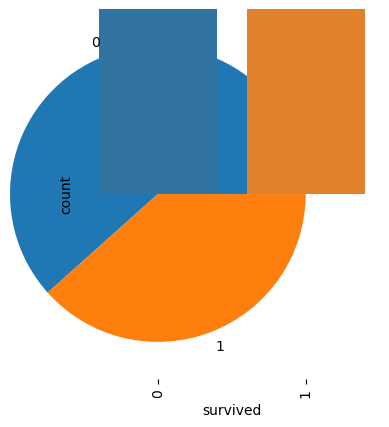

In [10]:
import matplotlib.pyplot as plt

#생존자와 사망자를 bar 그래프로 표현하기
titanic.survived.value_counts().plot(kind='bar')

#생존자와 사망자를 pie 그래프로 표현하기
titanic.survived.value_counts().plot(kind='pie')

#seaboarn 라이브러리의 countplot 응용
sns.countplot(x='survived', data=titanic)

## 03 표본 추출

빅데이터는 전수처리가 기본이지만 test, 비식별화 등의 용도로 undersampling 을 학습데이터 증강 등의 용도로 oversampling 할 수 있다.

* 단순 추출
    * df.sample(n=추출 개수, frac=추출 비율, replace=중복 추출 여부, random_state=랜덤 시드, ignore_index=새로 인덱스 부여 여부)
    * 랜덤 시드를 같게 주면 같게 추출이 됨

In [11]:
titanic.sample(frac=0.5, random_state=1) #단순 추출

#age에 가중치를 두고 뽑고, 그 값들 중 age의 평균을 구해보자
print(titanic.sample(frac=0.5, random_state=1, weights='age')['age'].mean())
print(titanic.sample(frac=0.5, random_state=1)['age'].mean())

34.2017937219731
28.46254189944134


* 층화 추출
    * 특정 nominal 필드의 비율 분포를 유지하면서 추출한다
    * train_data, test_data = train_testsplit(데이터, test_size=0.1, randome_state=1, stratify=필드)
    * from sklearn.model_selection import 해야 함
    * 복수의 필드를 startify 하기 위해서는 combined 필드를 만들어야 한다.

In [12]:
print("org data:\n", titanic['sex'].value_counts(normalize=True) ) #기존 성별의 비율

#추출 비율이 0.1 일 때 단순추출
print("\n0.1 sample:\n", titanic.sample(frac=0.1, random_state=1 )['sex'].value_counts(normalize=True) )

#층화 추출
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(titanic, test_size=0.1, random_state=1, stratify=titanic['sex'])
print ("\nstratified sample:\n", test_data.sex.value_counts(normalize=True))

org data:
 male      0.647587
female    0.352413
Name: sex, dtype: float64

0.1 sample:
 male      0.640449
female    0.359551
Name: sex, dtype: float64

stratified sample:
 male      0.644444
female    0.355556
Name: sex, dtype: float64


* over sampling
    * 단순히 copy(duplication) 하는 방법
    * 원래 통계 분포를 유지하며 데이터 생성 (비식별화 방법으로도 사용)
        * 원래 데이터 분포를 학습하여 모델 만들기
        * 모델로부터 데이터 생성(재현)
        
* CTGAN
    * 연속 데이터는 부동 소수점으로 표시되어야 함
    * 이산 데이터는 ints 또는 string으로 표현되어야 함
    * 데이터에 결측값이 없어야 함
    
* 함수 정리
    * pip install ctgan
    * dropna로 결측치 드롭, 이산값이 아닌 컬럼 드롭
    * 이산값 columns를 정의
    * ctgan = CTGAN(epochs=10)
    * ctgan.fit(titanicsub, discrete_columns) #모델링 
    * synthetic_data = ctgan.sample(1000)  # 생성

In [13]:
pip install ctgan

Note: you may need to restart the kernel to use updated packages.


In [14]:
import seaborn as sns
import pandas as pd
titanic= sns.load_dataset("titanic")

from ctgan import CTGAN
titanicsub=titanic

#결측값을 전부 없앤다
titanicsub=titanicsub.dropna(subset=['age'])
titanicsub = titanicsub.dropna(subset=['pclass'])
titanicsub = titanicsub.dropna(subset=['sex'])
titanicsub = titanicsub.dropna(subset=['who'])
titanicsub = titanicsub.dropna(subset=['adult_male'])
titanicsub = titanicsub.dropna(subset=['alive'])
titanicsub = titanicsub.dropna(subset=['alone'])
print(titanic.info())

#이산값인 colums을 정의한다.
discrete_columns = ['pclass', 'sex', 'who','adult_male', 'alive', 'alone']  # nominal 필드 지정 필요

#위에서 정의한 컬럼을 제외한 다른 컬럼을 지운다
titanicsub=titanicsub.drop(columns=['class', 'deck', 'embarked', 'embark_town'])

ctgan = CTGAN(epochs=10)

ctgan.fit(titanicsub, discrete_columns) #모델링 
synthetic_data = ctgan.sample(1000)  # 생성
synthetic_data['age'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


31.38496443129877

## 04 Numeric data

기술 통계
* df.describe() : 기술 통계 보기
* 데이터에 대한 가장 기본적인 분석: 범위, 최대, 최소, 평균

In [15]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

평균 vs 중간값
* 평균을 구하는 것은 데이터에 대해 가장 기본적인 분석
* 평균은 특이값에 영향을 많이 받음
* 중간값은 특이값에 크게 영향 받는 것을 보완


- Quantile : 1/4 단위로 자른 0%, 25%, 50%, 75% , 100% 의 값  
    * quantile(.25) quantile(.5) quantile(.75) quantile(1)
- Quantile : 100% 중에 어느 값
    * quantile(.99)
- IQR : 25~75% 의 범위 => 극단값에 영향을 받지 않는 중간 50% 의 범위를 의미

In [16]:
import numpy as np
np.mean ([52, 53, 60, 64, 76])

# 홀수개 데이터면 가운데값
np.median( [52, 53, 60, 64, 76])
# 데이터가 짝수개 이면 가운데 2 값의 평균
np.median([52, 53, 60, 64, 76, 500 ])

62.0

In [17]:
print(titanic['age'].quantile(.25))
print(titanic['age'].quantile(0.99))

20.125
65.87


## 수치 데이터 시각화1 - boxplot 

- 값의 분포를 볼 수 있다
- 중간값, outlier 등을 확인

## outlier 

- 값이 다른 데이터 분포를 크게 벗어나는 데이터 
- 평균 등에 큰 영향을 줌
- 처리상의 오류일 수도 있고, 진짜 큰 값일 수도 있다  (몸무게 300kg vs. 500kg, 연매출 1조 vs. 8000조 ) 
- 통계적 정의 ( by John Tukey) 
    - 25% 값 - 1.5 X IQR 보다 작은 값 
    - 75% 값 + 1.5 X IQR 보다 큰 값

{'whiskers': [<matplotlib.lines.Line2D at 0x2043b11c820>,
 'caps': [<matplotlib.lines.Line2D at 0x2043b11cdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2043b11c550>],
 'medians': [<matplotlib.lines.Line2D at 0x2043b12d3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2043b12d670>],
 'means': []}

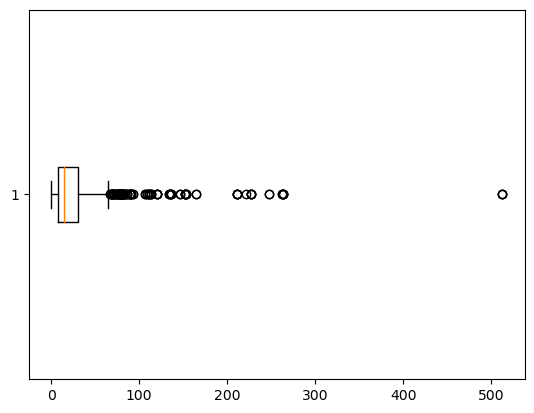

In [18]:
# numeric data 요금 분포 보기
plt.boxplot(titanic.fare, vert=False)

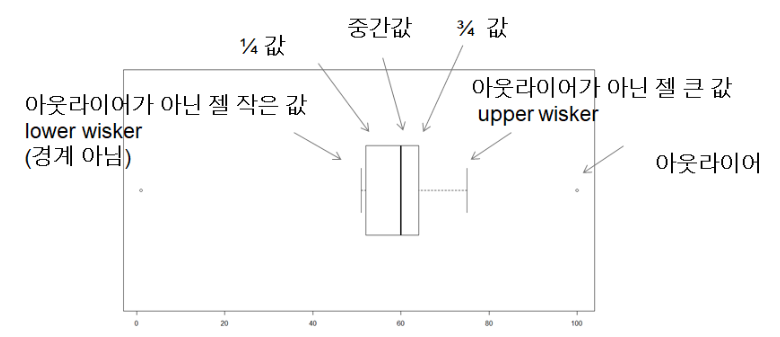

In [19]:
#IQR 구하기
so = titanic['fare'].quantile(0.25)
eo = titanic['fare'].quantile(0.75)
IQR = eo - so
outlier = IQR * 1.5 #outlier는 IQR 에 1.5배를 한 것이다

## 수치 데이터 시각화2 
- numeric (continuous) data => 구간화 (bin) 해서 출력 
- countplot 으로 출력하는 경우  : 동일 값이 많이 나오면 그걸 보여주기는 하지만 어느 부분에 분포가 많이 되어 있는지와는 또 다르다
- 정수 데이터와 실수 데이터는 또 양상이 다르다


- countplot(x="컬럼명", data="df 명")
- histplot// 히스토그램, bins를 설정
- scatter //퍼져있는 점 모양 그래프

<AxesSubplot:xlabel='fare', ylabel='count'>

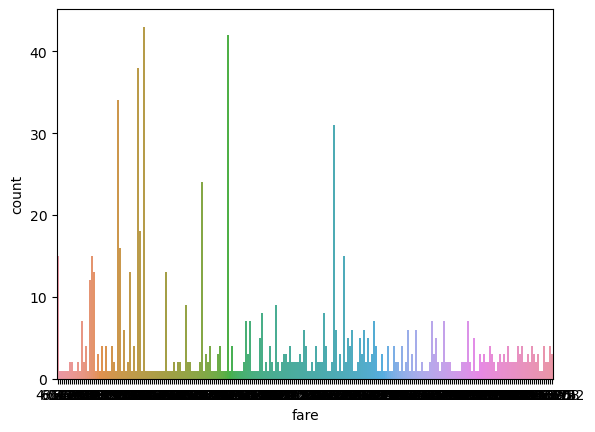

In [20]:
sns.countplot(x='fare', data=titanic)

<AxesSubplot:xlabel='fare', ylabel='Count'>

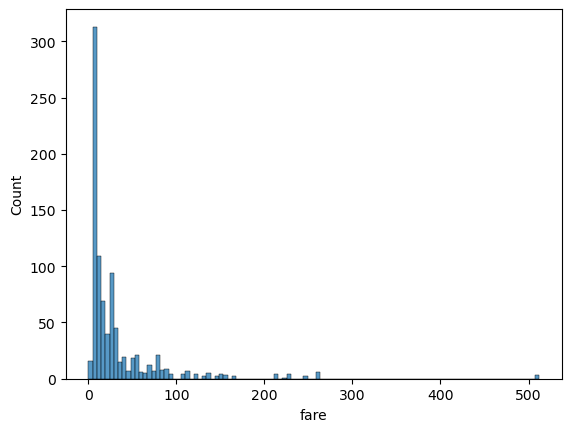

In [21]:
sns.histplot(x='fare', data=titanic)

<AxesSubplot:xlabel='fare', ylabel='Count'>

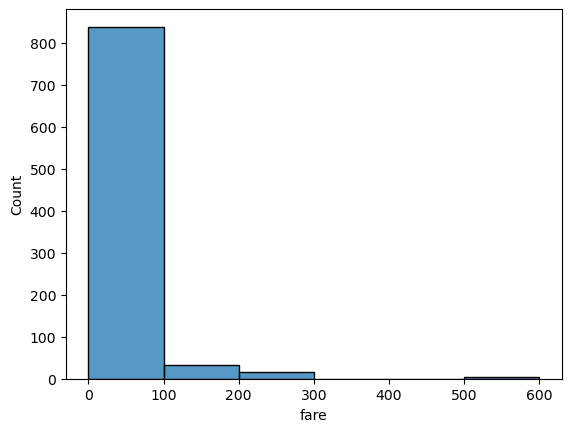

In [22]:
sns.histplot(x='fare', data=titanic, bins=[0,100,200,300,400,500,600]) # 또는 bins= 갯수

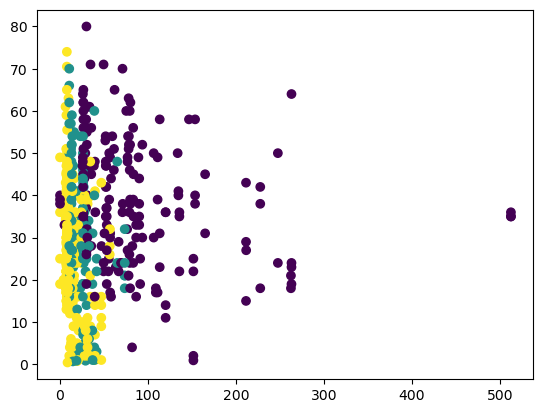

In [23]:
import matplotlib.pyplot as plt
plt.scatter ("fare", "age", c="pclass", data=titanic)
#x=fare, y=age, c=색깔인데, pclass별로 색 다르게 한 것

## 결측치, 오류 데이터 처리 

- 특이치 : 실제 데이터 값이 특이하게 크거나 작거나, 주로 numeric에서 
    - 원칙은 아웃라이어 기준으로 판단해야.. 
    - quantile (0.99) 값 등으로 대체 하기도 함
- 결측치 : 데이터 값이 없는 것 , NA라고도 함
    - 해당 레코드를 삭제하거나
    - 통계시 (통계란 column 단위로 이뤄짐) 해당값 빼고 계산
    - 대체 값 (평균, 중간값, 임의값, random 값) 을 만들어 넣기
    - column 별로 통계를 내는 것이기 때문에 결측치가 있어도 상관없다. 엉뚱한 값을 억지로 넣는 것 보다는.. 
            - 다만, paired value analysis (같은 레코드의 두 값을 비교 ) 하는 경우는 결측치가 있으면 안됨
- 오류 : 쓰레기 값이 들어있는 경우 
    - cleansing 이 필요: 원래 값을 살릴 수 있으면 살리고, 아니면 NA화 후 처리 
        - whitespace제거 등등
        - 같은 항목으로 count될 수 있게
    - 혈액형 A, B, O, AB 만 있어야 <= category의 경우 프로그램적으로 거를 수 있다


### 결측치 (NA) 처리
- 결측치 찾기 : isnull()
- 값 넣기 :  fillna ( 넣을값 ) 
- 결측치 포함 행 (레코드) 삭제 : dropna( subset=[체크할 컬럼명 ] ) 

In [24]:
#결측치 개수 구하기
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
# 삭제하기 : 레코드 단위

titanic=titanic.dropna(subset=['age'])
print(titanic.isnull().sum())
titanic.age.median()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64


28.0

In [26]:
#  age 결측치 중간 값으로 채워넣기 : column 값을 다시 만들어서 assign 하는 것에 주의
import seaborn as sns

titanic= sns.load_dataset("titanic")

titanic.age= titanic.age.fillna( titanic.age.median())

titanic

# int 변환시 오류 안남. 결측치를 제거해서.
titanic.age.astype(int).min()

0

### category 세팅

- 컬럼.unique() : unique 값 조회
- pd.Categorical( 컬럼 , categories=[값, 값, 값 .. ] )  # 정해진 값 이외에는 NaN 으로 처리
- 일종의 data cleansing 

In [27]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [28]:
#who의 카테고리를 man, woman으로 정하였으므로 child는 NAN처리 되고, 이후 unique()하므로 man woman만 생김
pd.Categorical ( titanic.who, categories=["man", "woman"]).unique()

['man', 'woman', NaN]
Categories (2, object): ['man', 'woman']

## 통계적 추정

- 빅데이터 : 전체 (투표) , 통계 : 샘플 (여론조사)
- 샘플 -> 전체를 추정 (여론 조사) 
    - 샘플통계 : 샘플 1000명을 조사 해본 결과 400명이 지지했다
    - 점추정 : 전체 인구의 지지율도 40% 일 것이다
    - 구간 추정
        - 여론조사 결과 40% (95% 신뢰 구간에서 ±4% 오차)
        - = 모집단(전체 인구) 의 (실제)지지율은 95%의 확률로 40%±4% 인 36%~44% 사이에 있을 것이다. 
        - = 36~44% 사이에 있을 확률이 95%
        - = 5%의 가능성으로 36% 보다 작거나 44% 보다 클 수 있다.

## 신뢰구간 구하기 (추정)

- import scipy.stats as st
- 30 개 이하의 샘플 :  st.t.interval(alpha=신뢰구간, df=샘플 갯수-1, loc=평균, scale=평균오차)
- 30 개 이상 : st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
- 샘플 뽑기 : df.sample( n=샘플갯수 or frac= 샘플비율)

In [29]:
import scipy.stats as st
import numpy as np

sample1=titanic.sample (n=30)
sample2=titanic.sample (frac=0.6)

print ("sample1:", np.mean(sample1.fare), st.t.interval(alpha=0.95, df=len(sample1)-1, loc=np.mean(sample1.fare), scale=st.sem(sample1.fare)))
print ("sample2:", np.mean(sample2.fare), st.norm.interval(alpha=0.95, loc=np.mean(sample2.fare), scale=st.sem(sample2.fare)))
print ("population:", np.mean(titanic.fare))

sample1: 34.33819666666667 (24.10630665048535, 44.570086682847986)
sample2: 32.57136953271024 (28.034654662675187, 37.1080844027453)
population: 32.2042079685746


C:\Users\user\AppData\Local\Temp\ipykernel_40232\1675585790.py:7: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print ("sample1:", np.mean(sample1.fare), st.t.interval(alpha=0.95, df=len(sample1)-1, loc=np.mean(sample1.fare), scale=st.sem(sample1.fare)))
C:\Users\user\AppData\Local\Temp\ipykernel_40232\1675585790.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print ("sample2:", np.mean(sample2.fare), st.norm.interval(alpha=0.95, loc=np.mean(sample2.fare), scale=st.sem(sample2.fare)))


## 평균비교

- 2개의 평균이 있을 때, 샘플에서는 평균이 차이가 나는데 실제 모집단에서도 차이가 날지 분석
- one sample t-test :  1개의 기준값 (ex, 지난 선거에서 지지율) 이 주어져 있고, 샘플 데이터 (ex. 이번달 여론조사 데이터) 가 주어진 경우, 유의미한 차이가 있나?
- 가설 검정
    - 가설 : 실제 모집단에서는 차이가 없다 
    - 검정 : 가설이 맞는지 판단하는 절차 
- 예 
    - 키 크는 약이 효과가 있는지.. 약을 먹인 몇 명의 결과를 놓고 판단하고자 함
    - 원래 중학교 2학년 인구의 키 평균 = 164
    - 1학년부터 약먹은 2학년(샘플) 평균 = 167 
    - 영가설 : 원래 키에서 변동이 없다 (샘플에서만 평균이 높게 나왔을 뿐) 
    - 검정 : 샘플로 추정할 수 있는 모집단의 신뢰구간 (전체 중학생에게 약을 먹였을 때, 그 평균은 95%의 확률로 이 구간내에 있을 것이다) 안에 원래 평균(164) 이 있다면, 영가설이 맞다 (변동이 없다=효과가 없다)  
    - 만약 검정 결과 원래 평균이 신뢰 구간 밖이라면, 영가설 기각 (변동이 있다)
    - 평균값이 => 통계적으로 유의미한 차이가 있다.

- st.ttest_1samp(데이터, 비교평균)
    - pvalue < 0.05 이면 영가설 기각 (아니면 영가설이 맞음)

In [30]:
st.ttest_1samp (sample2.fare, 20) # 샘플 집단의 배 삯 평균은 20

Ttest_1sampResult(statistic=5.431117499404562, pvalue=8.518630905356539e-08)

## 도수비교

- nominal 데이터의 값 별 분포가 차이가 있는가? (샘플에서 그렇게 나왔는데 전체도 그렇다고 추정할 수 있나?)
- 특정 혈액형이 더 많은가?  
- 가설 : 혈액형 분포는 같다 = 고르게 분포한다 (영가설)
- 검정 : chisquare ( 데이터 ) 
    - 실제 분포가 균등한데, 샘플이 이렇게 나올 확률을 얻음
    - if pvalue < 0.05  전체도 다르다고 추정할 수 있음
    - 카테코리 별로 => 통계적으로 유의미한 차이가 있다.
    

In [31]:
# chisqaure 사용법
from scipy.stats import chisquare
chisquare ([10, 12, 13, 5])  # 원래는 균등 분포인데, 샘플에서만 우연히 이렇게 차이나왔을 가능성 28%

# 샘플이 커지면 
chisquare ([100, 120, 130, 50 ] ) # 원래는 균등 분포인데, 이렇게 큰 샘플에서 우연히 이렇게 차이가 많이 나게 나올 가능성 0.000002 %

# titanic data에 적용 
num_class=sample1["class"].value_counts()
print (num_class)
print ( chisquare (num_class) )

num_class=sample2["class"].value_counts()
print (num_class)
print (chisquare (num_class))
#num_class

Third     14
First     12
Second     4
Name: class, dtype: int64
Power_divergenceResult(statistic=5.6, pvalue=0.06081006262521797)
Third     305
First     125
Second    105
Name: class, dtype: int64
Power_divergenceResult(statistic=136.07476635514016, pvalue=2.8296969249169663e-30)


# 빅데이터 05

##  2개 변수 간의 관계 분석

- 상관이 있는가?
- 독립변수가 종속변수에 영향을 주었는가? 
- 변수 유형
    - nominal  vs. numeric 
    - discrete vs. continuous
- 또다른 분류
    - unordered nominal : 혈액형, 남녀
    - continuous numeric : 키, 몸무게   (같은 사람이 없다) 
    - ordered nomianl : 성적 (  A, B, C, D, E ), 직급 (사원, 대리, 과장, 차장, 부장)
    - discrete numberic :  나이 
    
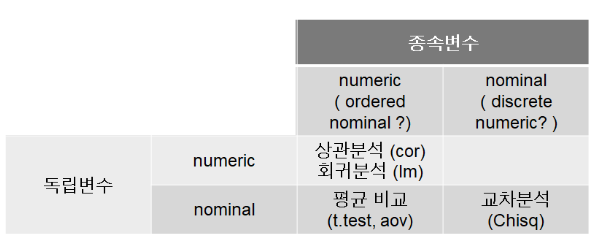
    

## nominal - nominal : 교차분석

 - 성별에 따라 생존자 숫자 (비율)이 다른가?
 - contigency table (cross table)  : 두 개의 변수의 도수를 표시
 - pd.crosstab ( 변수1, 변수2, normalize=True or False)  : normalize = 비율
 - 교차 분석이라고 부름

In [32]:
import seaborn as sns
import pandas as pd

titanic= sns.load_dataset("titanic")
pd.crosstab(titanic.sex, titanic.survived)

survived    0    1
sex               
female     81  233
male      468  109

In [33]:
pd.crosstab(titanic.sex, titanic.survived, normalize=True)

survived         0         1
sex                         
female    0.090909  0.261504
male      0.525253  0.122334

## 시각화 
- bar차트 : crosstab객체.plot.bar () 

<AxesSubplot:xlabel='sex'>

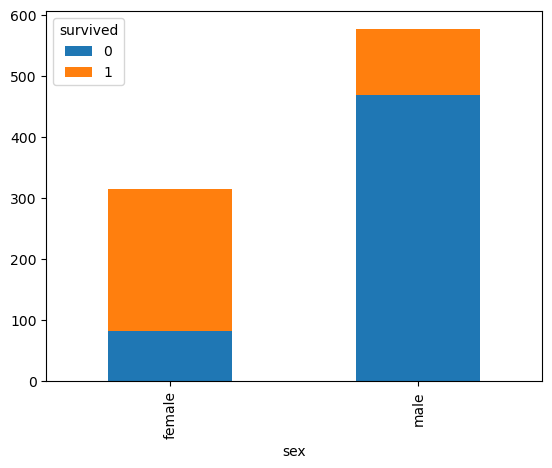

In [34]:
ct=pd.crosstab(titanic.sex, titanic.survived)
ct.plot.bar(stacked=True)   # seaborn lib

array([<AxesSubplot:ylabel='female'>, <AxesSubplot:ylabel='male'>],
      dtype=object)

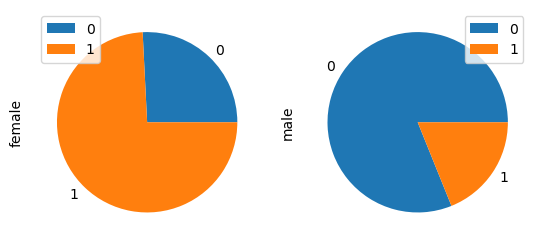

In [35]:
ct=pd.crosstab(titanic.survived, titanic.sex )  
ct.plot.pie(subplots=True) 

## 차이의 통계적 유의성
- 통계적 유의성 (= 모집단에서도 그럴 것인가 = 지금 샘플의 결과에서의 차이가 통계적으로 유의미한 차이인가)
- chi2_contingency(crosstab) 
- pvalue < 0.05 이면 (남녀 생존율이) 통계적으로 유의미한 차이가 있다. 


In [36]:
from scipy import stats
stats.chi2_contingency(ct) # 2번째 값이 p value

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

# nominal-numeric : 평균 비교
- nominal data value group  (독립변수) 에 따라 numeric value (종속변수) 의 mean이 다른가?
- 독립변수 -> 종속변수 
- df.groupby (독립변수).종속변수.mean()

In [37]:
# 값이 2 종인 독립변수
titanic.groupby('sex').fare.mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [38]:
# 값이 3종 이상인 독립변수
titanic.groupby('class').fare.mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [39]:
# mean 외에도 가능 
titanic.groupby('class').fare.median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

## 시각화 
- sns.boxplot (x=독립변수, y=종속변수, data= df ) 

<AxesSubplot:xlabel='sex', ylabel='fare'>

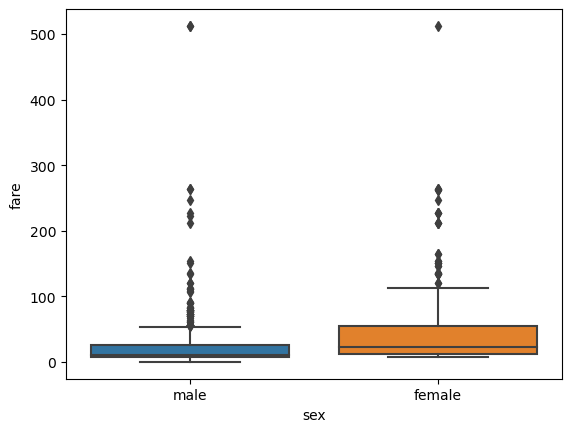

In [40]:
import seaborn as sns

sns.boxplot(x='sex', y='fare', data=titanic)

- 다른 변수 추가 : hue 옵션  sns.boxplot (x=독립변수, y=종속변수, hue=추가 변수, data= df ) 
- 3변수 

<AxesSubplot:xlabel='sex', ylabel='fare'>

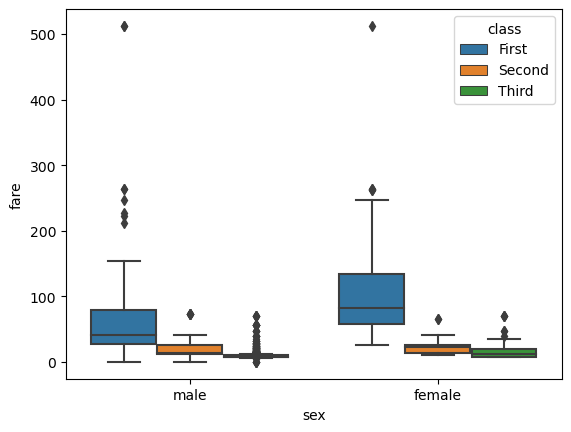

In [41]:
sns.boxplot(x='sex', y='fare', hue='class', data=titanic)

## 2변수 평균 비교 - 통계적 유의성

- Nominal인 독립변수 값의 종류가 2가지 일 때 : t-test
    - numeric 종속변수 
    - 3가지 이상일 때 : anova ( 3변수 이상과 구분 ) 
- T-test도 2종류가 있음
    - 독립적 2 sample 비교 : 서로 다른 group의 값을 비교하는 경우 (예: 남 vs.여)  
    - paired 2 sample 비교 : 같은 대상의 서로 다른 값을 비교하는 경우 (예: 약먹기전의 수치 vs. 약먹은 후의 수치)
    
- 독립적 2 sample 비교 
    - 우선, 분산 비교(F-test: 등분산성, 분산이 차이가 있는지 없는지 )를 해야 함 
    - levene ( sample1, sample2) : p-value < 0.05 이면, 통계적 유의성이 있게 분산의 차이가 있음 
    - ttest_ind ( sample1, sample2, equal_var=True of False)

In [42]:
from scipy.stats import levene, ttest_ind, ttest_rel

# 값이 2 종인 독립변수
titanic.groupby('sex').fare.mean() 

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [43]:
male= titanic[titanic.sex=="male"]
female= titanic[titanic.sex=="female"]
levene(male.fare,female.fare)

LeveneResult(statistic=19.188225990910503, pvalue=1.3255194429754062e-05)

In [44]:
ttest_ind(male.fare, female.fare, equal_var=False)

Ttest_indResult(statistic=-5.077499013458909, pvalue=5.388057409693902e-07)

- 해석 : 성별에 따른 요금의 차이가 통계적 유의성이 있다. (=통계적으로 유의미한 수준의 차이가 있다)

In [45]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

###  paired 2 sample

- paired 2 sample :  ttest_rel ( 벡터1, 벡터2)  
- 벡터1, 2의 길이가 같아야.. 
- 같은 레코드 내의 2개 변수 pair
- 2개 변수는 같은 종류 (예, 몸무게) 
- 약을 먹기 전 후에 몸무게 비교
- NA 가 없어야


In [46]:
#임의의 데이터 만들기
import numpy as np
import pandas as pd
sl=pd.read_csv("./files/studentlist.csv",encoding="cp949")

sl.insert(7, column='height2', value=sl.height+np.random.randint(0,5, len(sl)))
sl

name sex  age  grade absence bloodtype  height  height2  weight  dept
0   김길동  남자   23      3       유         O   165.3    167.3    68.2     2
1   이미린  여자   22      2       무        AB   170.1    172.1    53.0     3
2   홍길동  남자   24      4       무         B   175.0    179.0    80.1     1
3   김철수  남자   23      3       무        AB   182.1    184.1    85.7     2
4   손세수  여자   20      1       유         A   168.0    172.0    49.5     1
5   박미희  여자   21      2       무         O   162.0    165.0    52.0     3
6   강수친  여자   22      1       무         O   155.2    159.2    45.3     2
7   이희수  여자   23      1       무         A   176.9    179.9    55.0     1
8   이철린  남자   23      3       무         B   178.5    181.5    64.2     1
9   방희철  남자   22      2       무         B   176.1    180.1    61.3     3
10  박수호  남자   24      4       유         O   167.1    167.1    62.0     3
11  임동민  남자   22      2       무        AB   180.0    183.0    75.8     3
12  김민수  남자   21      1       무         A   162.2    165.2    55.3     1
13  이희진  여자   23      3       무         O   176.1    180.1    53.1     2
14  김미진  여자   22      2       무         B   158.2    160.2    45.2     3
15  김동수  남자   24      4       유         B   168.6    169.6    70.2     1
16  여수근  남자   21      1       무         A   169.2    171.2    62.2     2

In [47]:
sl.describe()

age      grade      height     height2     weight       dept
count  17.000000  17.000000   17.000000   17.000000  17.000000  17.000000
mean   22.352941   2.294118  170.035294  172.741176  61.064706   2.000000
std     1.169464   1.104802    7.849756    8.069159  11.851685   0.866025
min    20.000000   1.000000  155.200000  159.200000  45.200000   1.000000
25%    22.000000   1.000000  165.300000  167.100000  53.000000   1.000000
50%    22.000000   2.000000  169.200000  172.000000  61.300000   2.000000
75%    23.000000   3.000000  176.100000  180.100000  68.200000   3.000000
max    24.000000   4.000000  182.100000  184.100000  85.700000   3.000000

In [48]:
ttest_rel ( sl.height, sl.height2)

Ttest_relResult(statistic=-9.617834072203427, pvalue=4.710726632121579e-08)

## 3 가지 이상의 값을 갖는 독립변수의 경우

In [50]:
titanic.groupby('pclass').fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

<AxesSubplot:xlabel='pclass', ylabel='fare'>

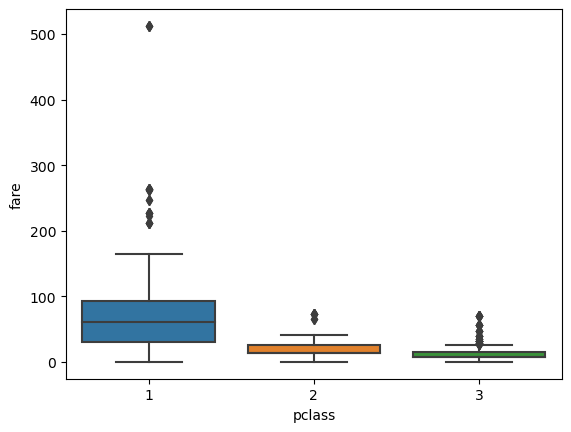

In [51]:
sns.boxplot(x='pclass', y='fare', data=titanic)

### one way anova

- m=ols ('종속변수~독립변수', df).fit ()  : 모델 생성
- anova_lm (m) : 모델에 대한 정보 조회
- 데이터분석에서 모델이란 : 간단히 데이터 또는 데이터 간의 관계를 설명하는 도구

In [52]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model=ols('fare~pclass', titanic).fit()
print (anova_lm(model))

             df        sum_sq        mean_sq           F        PR(>F)
pclass      1.0  6.636250e+05  663624.976929  384.547434  1.967386e-71
Residual  889.0  1.534174e+06    1725.729827         NaN           NaN


- 해석 : class 별 차이가 통계적 유의성이 있는 수준이다.


## numeric-numeric (상관분석)
- 상관관계 : 같이 증가, 같이 감소 (선형적 상관관계)
- 독립변수 -> 종속 변수 같은 순서가 없음
- 데이터를 봐서는 상관관계를 알기 어려움, 시각화 필요

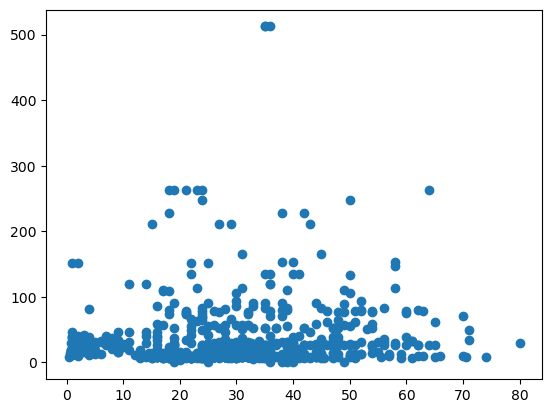

In [53]:
import matplotlib.pyplot as plt

#나이와 요금
plt.scatter("age", "fare", data=titanic)

- 시각화로도 충분치 않아서, 수치화된 계수가 필요
- 상관계수  -1 ~ 1
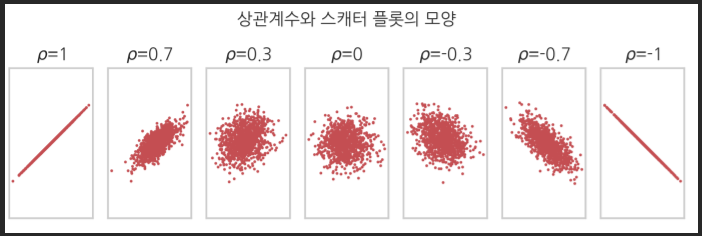
- 상관계수구하기: df.corr() <= 방향성이 없음
    

In [54]:
# 변수 간 상관계수 구하기 
titanic[['age','fare']].corr()

age      fare
age   1.000000  0.096067
fare  0.096067  1.000000

In [55]:
# 모든 numeric변수에 대해 (int 인 nominal포함)
titanic.corr() 

survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000

- 상관분석 : 상관도가 높은 변수 pair를 찾아내기 
- 위의 table 도 눈에 안들어오니 시각화 필요
- sns.pairplot(df, hue=키변수) , 키 변수 : 제3의 변수 추가 분석

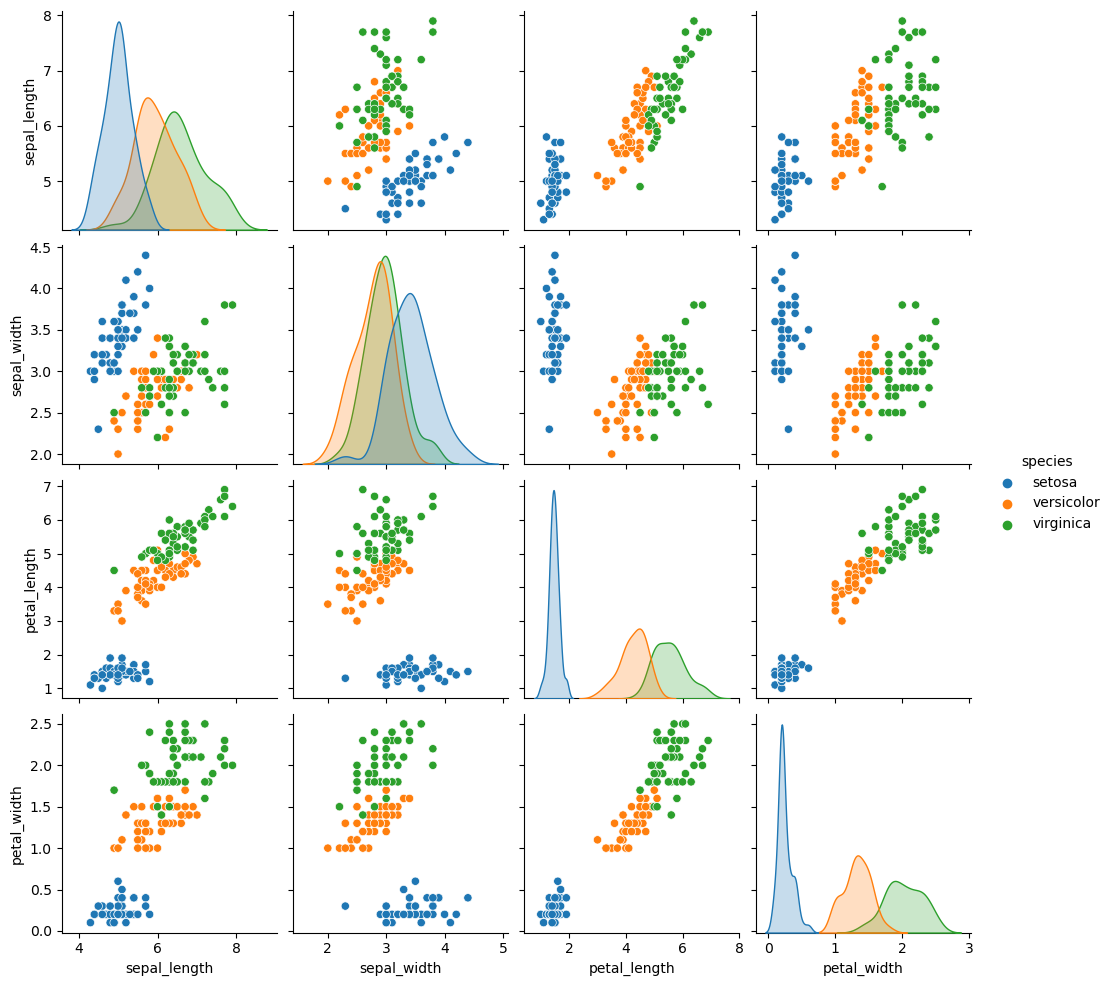

In [56]:
iris=sns.load_dataset('iris')
sns.pairplot(iris, hue = 'species')

<AxesSubplot:>

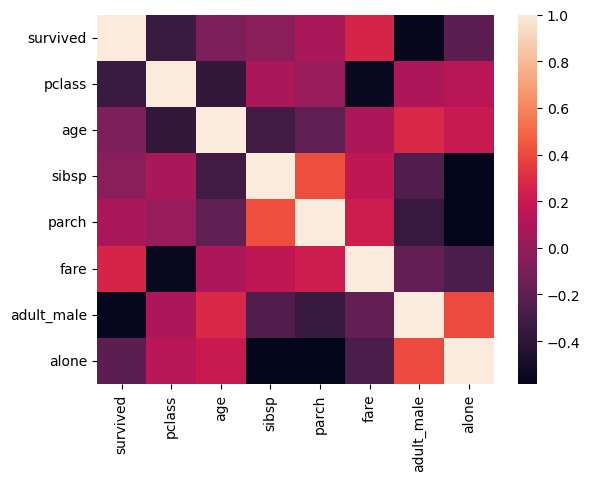

In [57]:
sns.heatmap( titanic.corr()  )

### discrete vs. continous

- discrete vs. continous 과 nominal vs. numeric 에 대해 다시 생각
- 상관계수의 강도 보기 : heatmap(), 밝을 수록 높은 상관관계

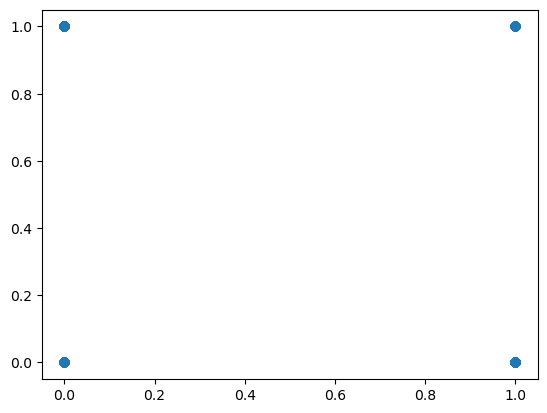

In [58]:
plt.scatter("survived","adult_male" , data=titanic)

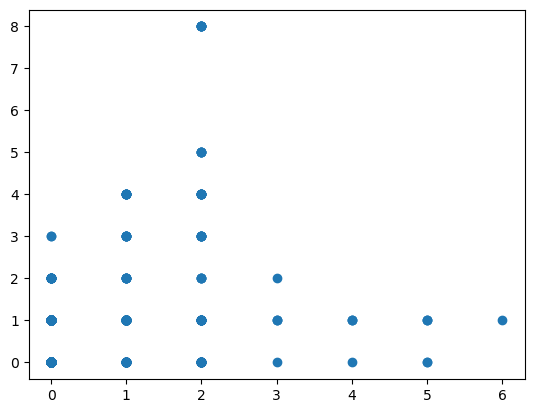

In [59]:
plt.scatter("parch","sibsp" , data=titanic)

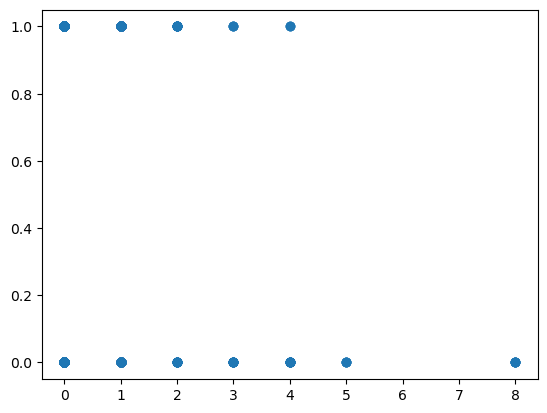

In [60]:
plt.scatter("sibsp","survived",  data=titanic)

## 스피어만 상관계수

- 기본은 pearson : 선형관계 (값의 크기 자체가 의미가 있는 numeric : 곱하기 나누기가 의미를 갖는 숫자)
- 수치형 변수 종류 (3가지)
    - 순서만 의미있는 수치 : 학력 (고졸, 대졸, 대학원졸.. )
    - +/- 가 가능한 수치 : 섭씨온도, 지능지수 
    -  */ /  가 의미있는 수치   : 중량
- spearman: 값의 크기 대신 순위로 계산 (순서가 있는 nominal 데이터)

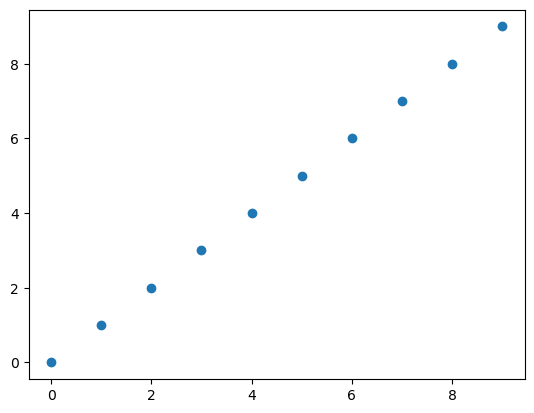

In [61]:
import numpy as np

x=np.arange(0,10)
y1=x

plt.scatter(x,y1)

In [62]:
stats.pearsonr(x,y1)

PearsonRResult(statistic=1.0, pvalue=0.0)

[  0   1   8  27  64 125 216 343 512 729]


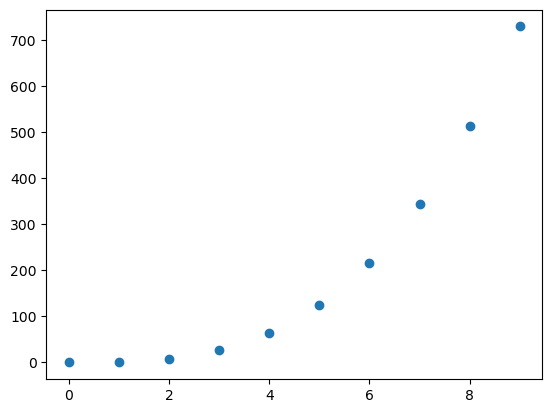

In [63]:
y3=x*x*x
plt.scatter(x,y3)
print (y3)

In [64]:
stats.pearsonr(x,y3)

PearsonRResult(statistic=0.9084337349397591, pvalue=0.00027503173641504566)

In [65]:
stats.spearmanr(x,y3)

SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)

## 상관 분석 시 주의점
- 상관계수의 해석이 주관적임(다음 같은 기준이 있긴 하나..)
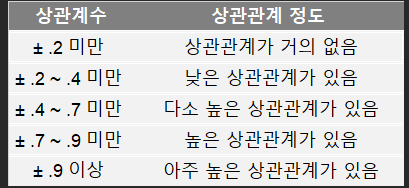

- 특히,개별 관측치에 속한 2변수 (예, 키-몸무게) 가 아닌, 상이한 2개의 통계 데이터( 연도 별 키의 통계, 연도 별 몸무게의 통계) 의 상관관계는 큰 의미가 없다 

- 30개 이상의 관측치(레코드)가 있어야 의미가 있다. t-test에서도 마찬가지.. 

## numeric-numeric (회귀분석)
- 상관관계 : 2 변수가 같이 증가, 같이 감소 (선형적 상관관계, 직선에 얼마나 몰려있는지)
- 회귀분석 : 독립변수 -> 종속변수 선형적 상관관계의 정도(기울기)까지 분석

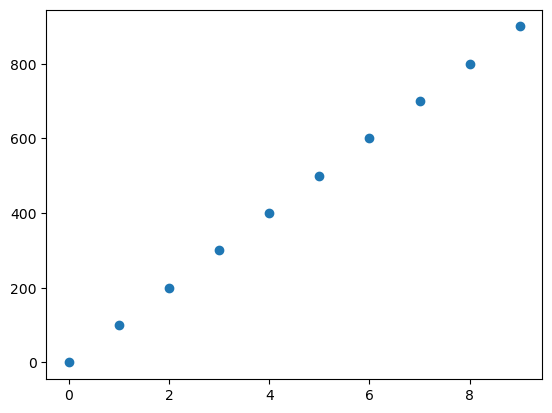

In [66]:
y2=100*x
plt.scatter(x,y2)

In [67]:
stats.pearsonr(x,y2)

PearsonRResult(statistic=1.0, pvalue=0.0)

## (잠깐 데이터 가공) wine 데이터 읽어오기 
- , 대신 다른 seperator를 쓰는 데이터 : read_csv ( sep="구분자")

In [69]:
# red wine 읽어오기
red_df= pd.read_csv("./files/winequality-red.csv", sep=";")
red_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

- dataframe에 column 과 값 추가 : df.insert( 위치, column=이름, value=값 )

In [70]:
red_df.insert(0, column='type', value='red')
red_df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [72]:
# white wine 읽어 오기, column 추가 및 합치기 
white_df= pd.read_csv("./files/winequality-white.csv", sep=";")
white_df.insert(0, column='type', value='white')
wine=pd.concat([red_df, white_df])

- wine data 탐색

In [73]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [74]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

## 회귀 분석 (regression)
- 단순 선형회귀 : 하나의 독립변수 -> 하나의 종속변수
- 모델 생성 : 모델=ols( '종속변수~독립변수', data=데이터).fit() 
- 모델 정보 조회 : 모델.summary(), 모델.params

In [75]:
from scipy import stats
from statsmodels.formula.api import ols, glm 

m1 = ols ( 'quality~alcohol', data=wine).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          1.50e-312
Time:                        14:26:40   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.000       2.237       2.574
alcohol        0.3253      0.008     39.970      0.000       0.309       0.341
==============================================================================
Omnibus:                      123.922   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.800
Skew:                           0.031   Prob(JB):                     6.34e-57
Kurtosis:                       3.976   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
print (m1.params)

Intercept    2.405269
alcohol      0.325312
dtype: float64


### 해석 

- coef : 선형 모델 (1차함수 직선)의 기울기  (선형적으로 어느 정도 영향을 주었는지 분석) 
- intercept: 절편
- y(종속변수)= coef*x(독립변수) + intercept

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

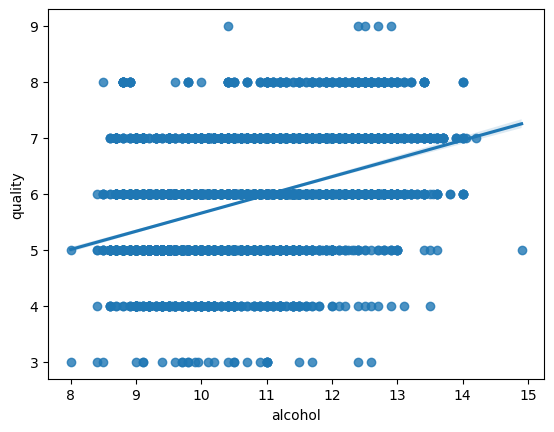

In [77]:
sns.regplot(x="alcohol", y="quality", data=wine)

### 모델과 예측
- 모델이란 ? 데이터를 설명하는 단순한 툴 (여기서는 1차함수의 절편, 기울기 => linear model) 
- 모델을 이용해서 예측을 할 수 있다. 

In [79]:
red_df= pd.read_csv("./files/winequality-red.csv", sep=";")
red_df.head()
m1 = ols ( 'quality~alcohol', data=wine[:3000]).fit()
m1.predict( wine[3000:].alcohol)

1401    5.393155
1402    6.016788
1403    5.947495
1404    6.190020
1405    5.704971
          ...   
4893    6.051434
4894    5.497093
4895    5.427801
4896    6.605775
4897    6.259312
Length: 3497, dtype: float64

### 중선형 회귀

- 중선형회귀 : 독립변수가 여러개 일때  
- 모델 생성 : 모델=ols( '종속변수~독립변수1+독립변수2+ ... ', data=데이터).fit()
- 심장병 발병 확률
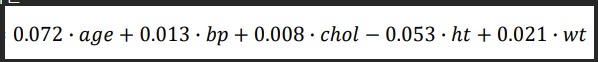

In [80]:
#공백있는 column 이름 처리 
wine.columns = [c.replace(' ', '_') for c in wine.columns]


m2 = ols ( 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar', data=wine).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          4.16e-115
Time:                        14:27:48   Log-Likelihood:                -8068.7
No. Observations:                6497   AIC:                         1.615e+04
Df Residuals:                    6492   BIC:                         1.618e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5408      0.063    103.286      0.000       6.417       6.665
fixed_acidity       -0.0187      0.009     -2.021      0.043      -0.037      -0.001
volatile_acidity    -1.4688      0.074    -19.728      0.000      -1.615      -1.323
citric_acid          0.0205      0.087      0.234      0.815      -0.151       0.191
residual_sugar      -0.0174      0.002     -7.734      0.000      -0.022      -0.013
==============================================================================
Omnibus:                       81.508   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.950
Skew:                           0.218   Prob(JB):                     2.41e-21
Kurtosis:                       3.401   Cond. No.                         92.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 각 독립변수의 영향이 출력됨 
- p < 0.05 작은 경우만 유의성을 가짐 
- 시각화 : plot_partregress_grid (모델)

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


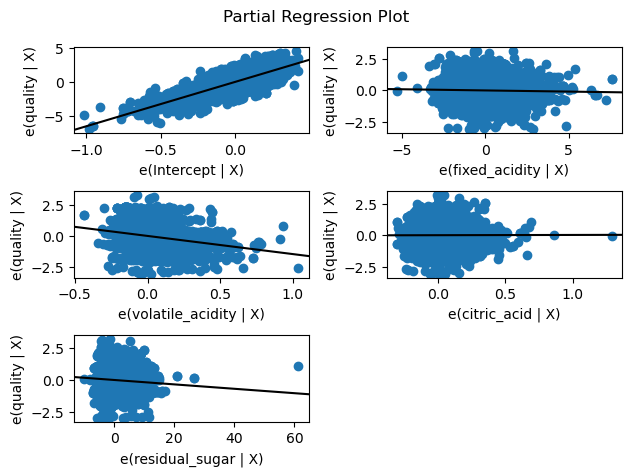

In [81]:
#시각화 
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig=plot_partregress_grid(m2)
fig.tight_layout(pad=1)

# 06 머신러닝
- 머신 러닝
- 회귀 예측

## 머신러닝 

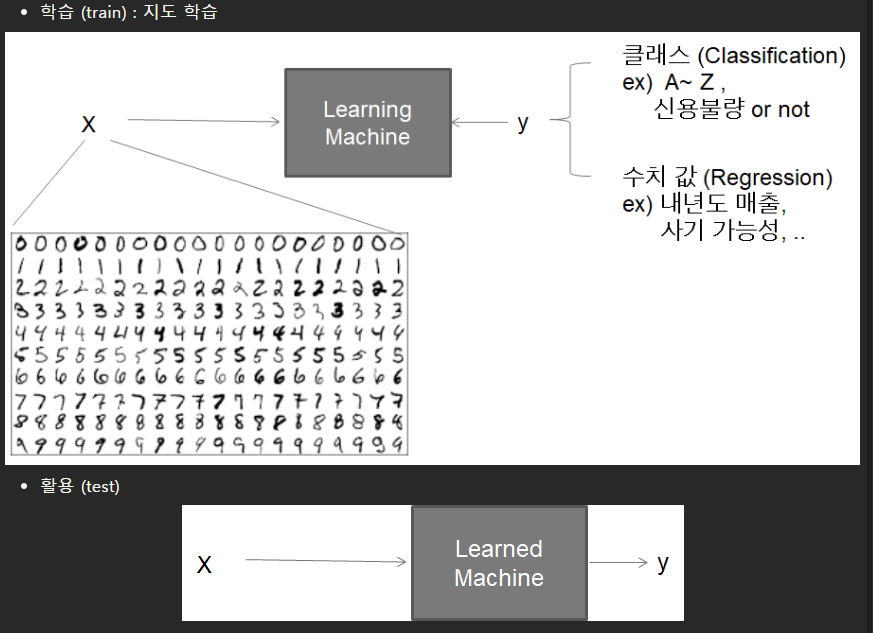
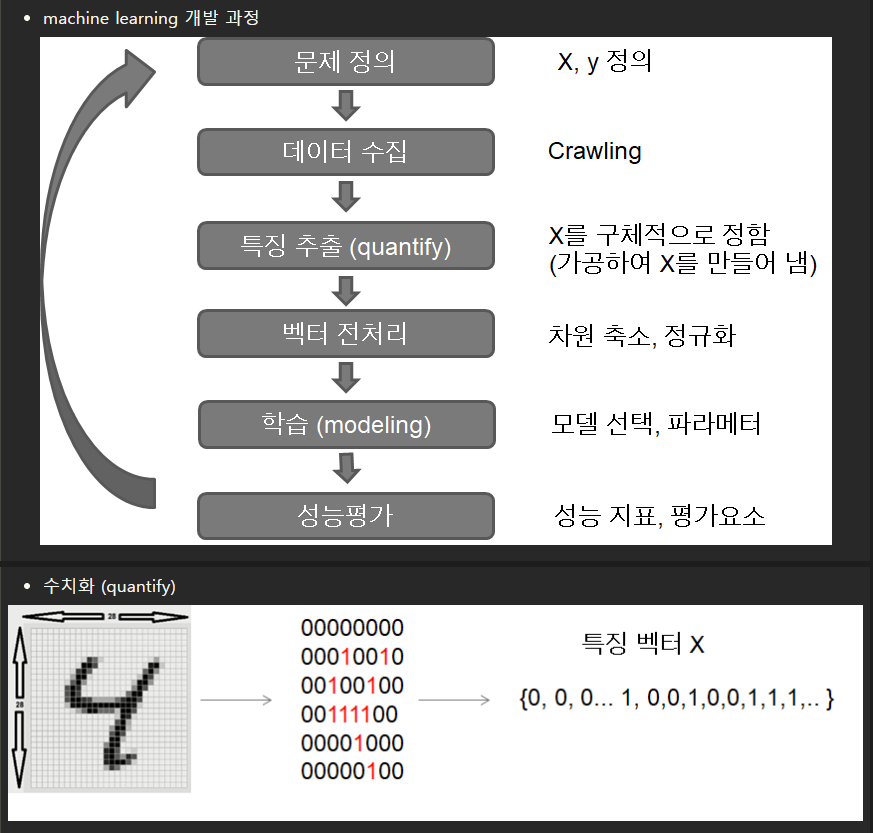
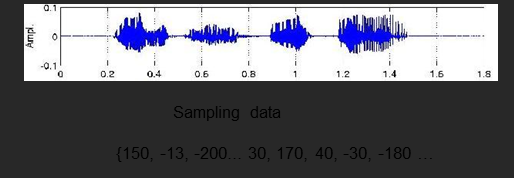
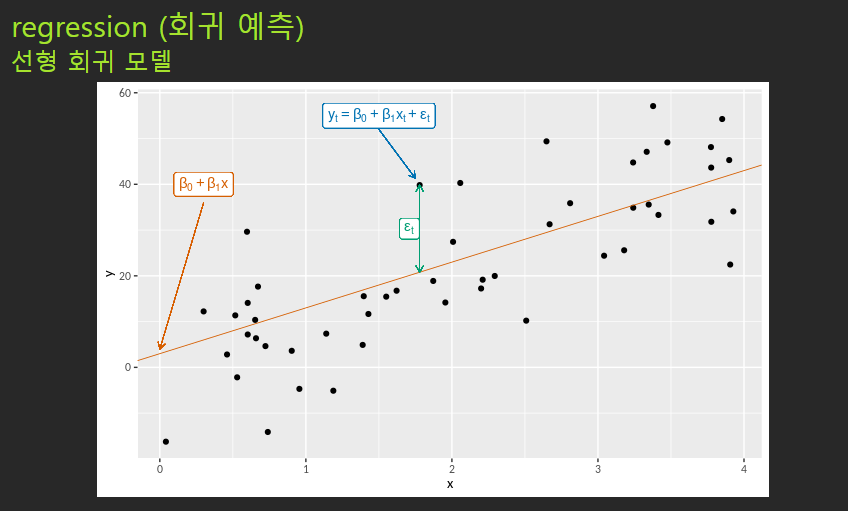

In [82]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

### - 머신러닝 패키지 sklearn 설치

In [83]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\user\AppData\Local\Temp\pip-install-3v8bl53h\sklearn_d458a50ee86f47238e2e34158d9761b7\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
  UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 2: illegal multibyte sequence
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## 집값 예측
### 1) 데이터 수집

In [84]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## 2) 데이터 준비 및 탐색

- housing.DESCR : 데이터 설명
- housing.data : X 데이터
- housing.feature_names: X 데이터 feature names
- housing.target : y 데이터


In [85]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [86]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df.head()   # 상위 5개를 출력

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [87]:
df['PRICE'] = housing.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

- dataframe.shape : 보편적 데이터 형태 조회

In [88]:
print(' 주택 가격 데이터 형태 : ', df.shape)

 주택 가격 데이터 형태 :  (20640, 9)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 3) 모델 training

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [91]:
# X, Y 분할하기
Y = df['PRICE']
X = df.drop(['PRICE'], axis=1, inplace=False)

print(X.shape, Y.shape)

(20640, 8) (20640,)


In [92]:
Y.head()


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

- train_test_split (X, Y, test_size=비율, random_state= 결과재현을 위한 random seed고정)

In [93]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

print( X_train.shape)
print( Y_train.shape)
print (Y_train) # row index, Y value 

(14448, 8)
(14448,)
10954    2.355
2538     0.600
5118     0.990
3269     1.406
13144    1.368
         ...  
1099     0.938
18898    1.031
11798    1.926
6637     1.535
2575     0.811
Name: PRICE, Length: 14448, dtype: float64


In [94]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict

array([2.81219561, 1.26208993, 1.43568493, ..., 1.82811758, 2.35080185,
       2.49388055])

## 4) 결과 분석 

### regression  모델 정보

In [95]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))
print (df.head())

Y 절편 값:  -35.70396107929858
회귀 계수 값:  [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [96]:
coef = pd.Series(data =lr.coef_, index=X.columns)

print (coef)

MedInc        0.442798
HouseAge      0.009073
AveRooms     -0.115072
AveBedrms     0.611526
Population   -0.000004
AveOccup     -0.003927
Latitude     -0.407213
Longitude    -0.420488
dtype: float64


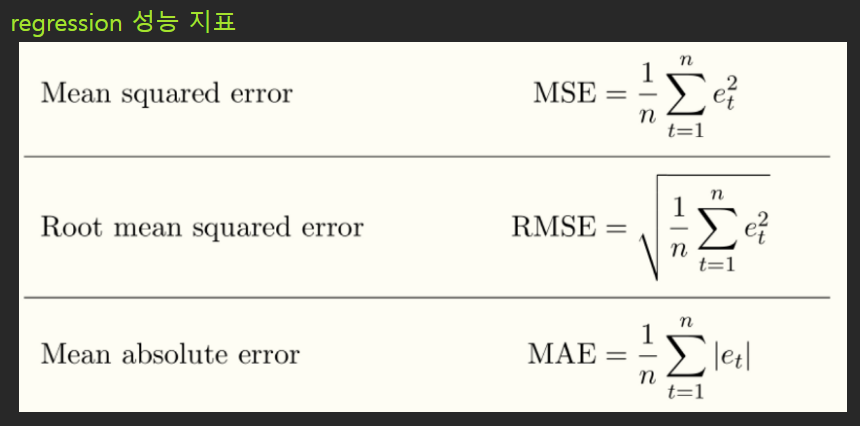

In [97]:
print ( Y_predict)
print ( Y_test)

[2.81219561 1.26208993 1.43568493 ... 1.82811758 2.35080185 2.49388055]
10385    2.78700
1943     2.07600
7490     0.96700
16889    3.53800
11416    3.90500
          ...   
16911    5.00001
15066    1.12500
19410    1.74100
10126    2.27000
18568    1.94500
Name: PRICE, Length: 6192, dtype: float64


In [98]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))


MSE : 0.539, RMSE : 0.734


### correlation

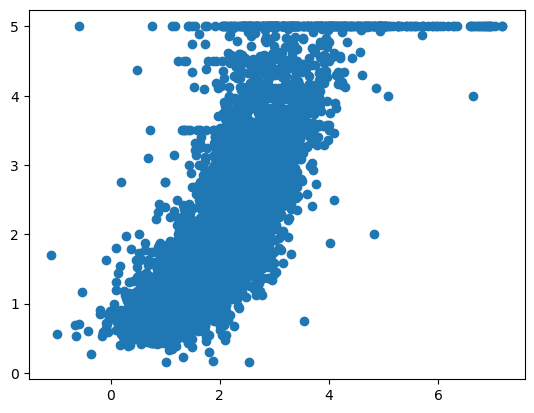

In [99]:
import matplotlib.pyplot as plt
plt.scatter(Y_predict, Y_test)

In [100]:
import scipy.stats as stats
print ( stats.pearsonr( Y_test, Y_predict))

PearsonRResult(statistic=0.7756332795047775, pvalue=0.0)


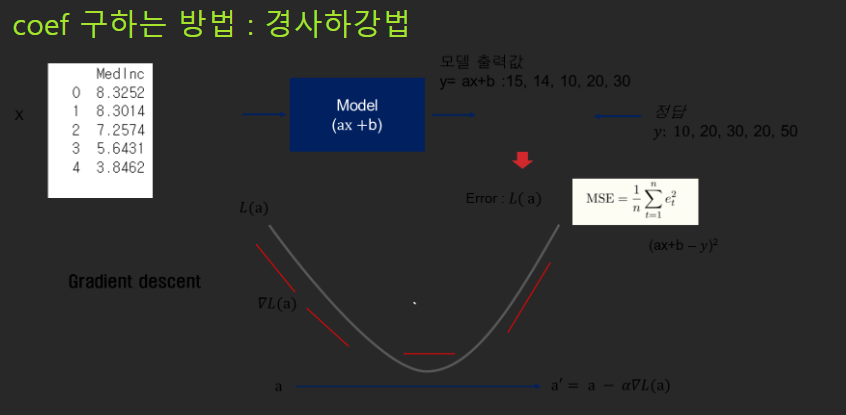
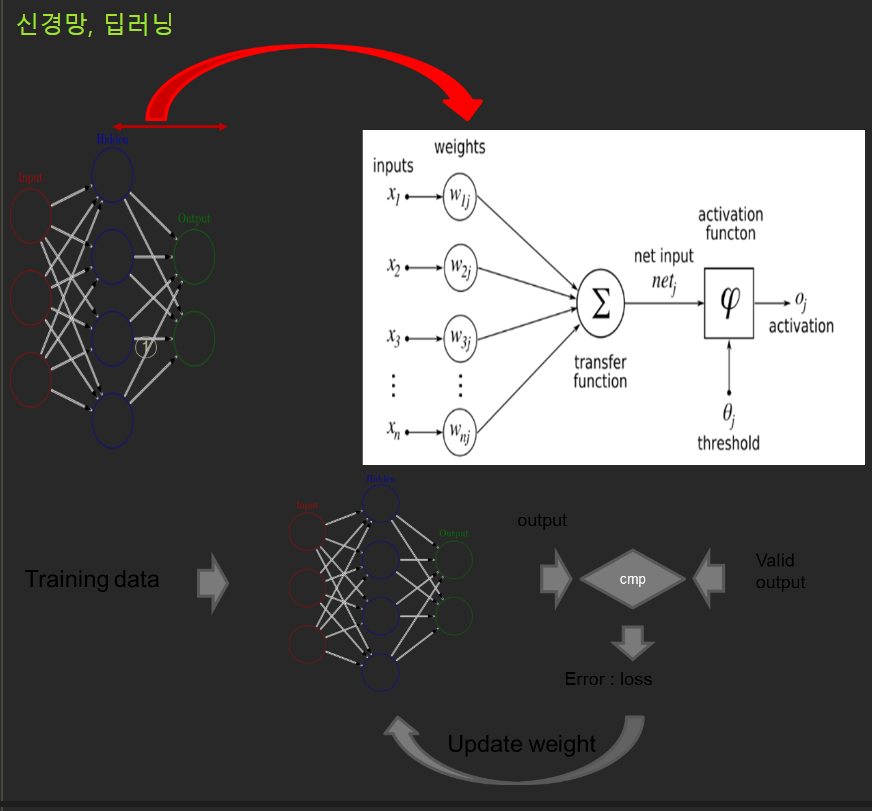

## 5)  시각화하기

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

- sns.regplot( x= X column, y= Y column, data= 데이터)

<AxesSubplot:xlabel='HouseAge', ylabel='PRICE'>

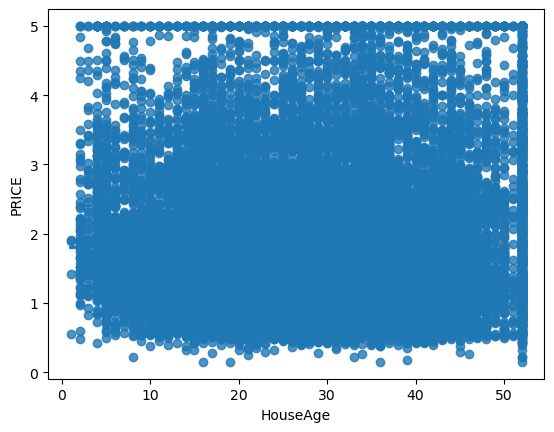

In [102]:
sns.regplot( x='HouseAge', y= 'PRICE', data= df)

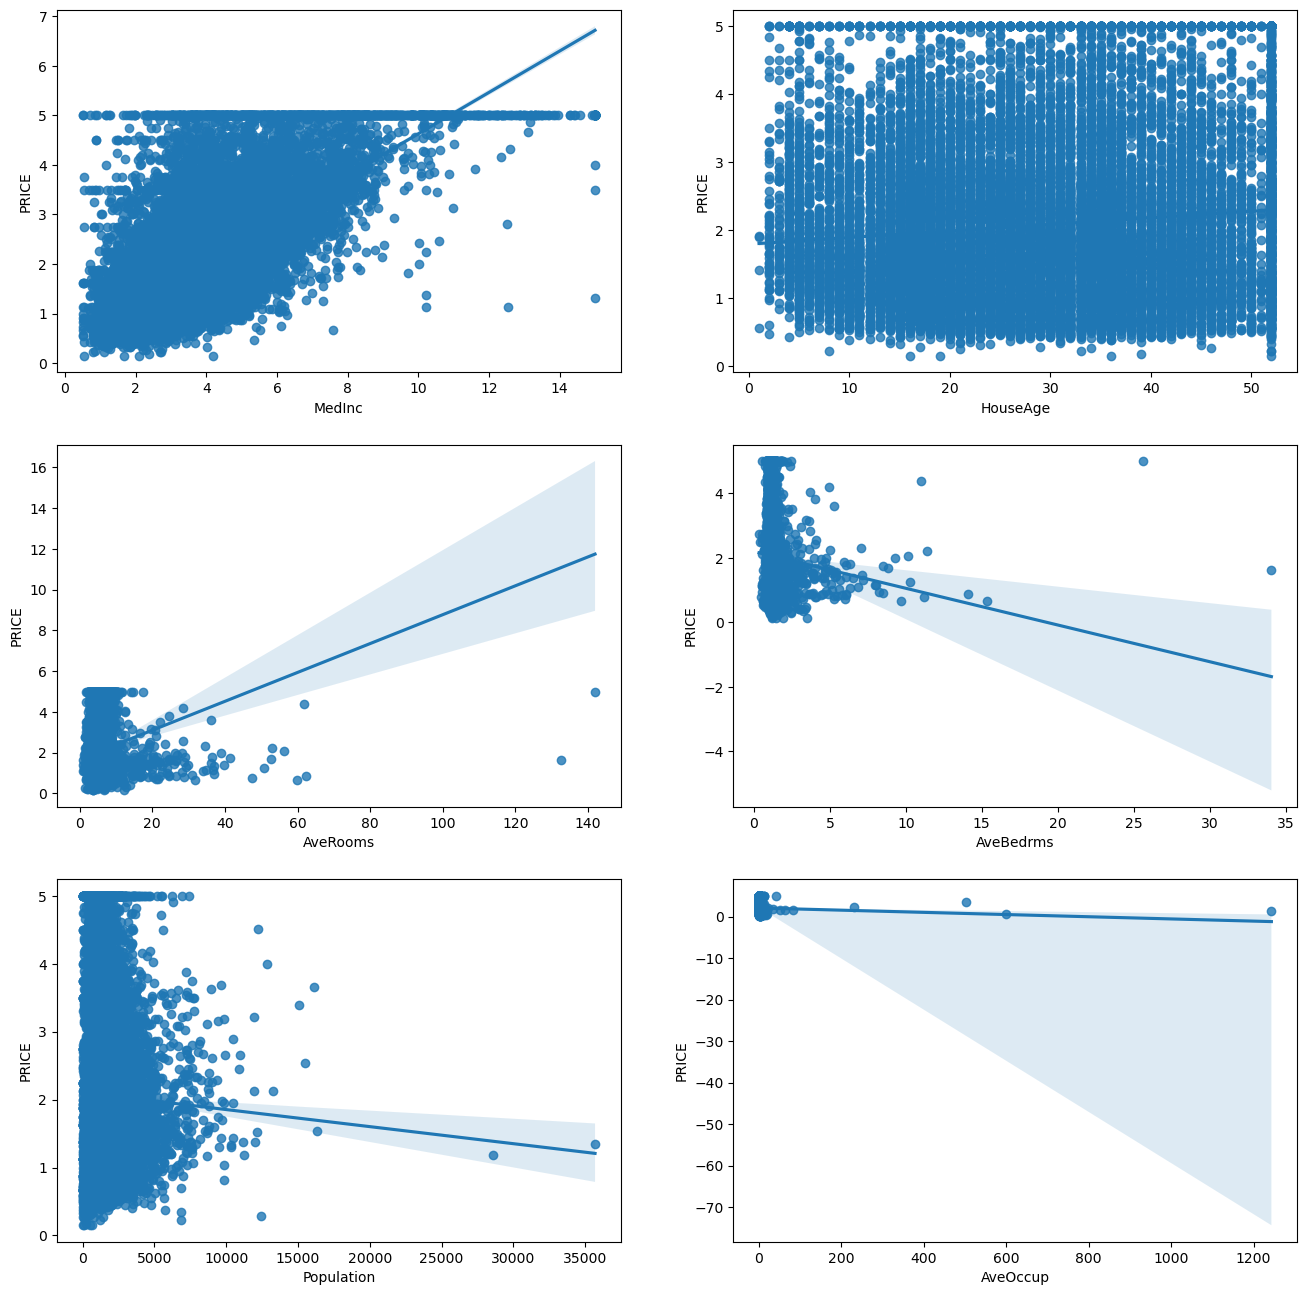

In [103]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=2, nrows=3)

x_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2

      sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

--- 

## 자동차연비 예측

## 1) 데이터 수집

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [110]:
import numpy as np
import pandas as pd 


data_df = pd.read_csv('./files/auto-mpg.csv', header=0, engine='python')

## 2) 데이터 준비 및 탐색

In [111]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df

 데이터셋 크기 :  (398, 9)


mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [112]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### - 분석하지 않을 변수 제외하기

- car_name : string
- origin : 명목변수 (크기가 의미가 없음)

In [114]:
#data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
data_df = pd.read_csv('./files/auto-mpg.csv', header=0, engine='python')
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)
data_df

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model_year  
0            70  
1            70  
2            70  
3            70  
4            70  
..          ...  
393          82  
394          82  
395          82  
396          82  
397          82  

[398 rows x 7 columns]

- 결측치 처리

In [115]:
#data_df['horsepower']=='?'
data_df[data_df['horsepower']=='?']

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model_year  
32           71  
126          74  
330          80  
336          80  
354          81  
374          82

- 결측치 처리 : horsepower , "?" 라는 값이 있어서 object로 처리됨
    - 결측치로 마킹 :  replace ('?', NaN)
    - record 전체를 날리거나, 대체값 넣어주기 : dropna, fillna

In [116]:
data_df.horsepower=data_df.horsepower.replace('?', np.NaN)
print ( data_df.shape)
data_df.info()

(398, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [117]:
data_df=data_df.dropna()
print ( data_df.shape)

(392, 7)


In [118]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [119]:
data_df.horsepower= data_df.horsepower.astype('int')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 23.0 KB


## 3) 모델 training

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [122]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [123]:
print ( X_train.shape)

(313, 6)


In [124]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [125]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [126]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [127]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 4))

Y 절편 값:  -16.37
회귀 계수 값:  [ 0.0521  0.0054  0.0073 -0.0074  0.1722  0.7483]


In [128]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
#coef.sort_values(ascending=False)
coef

cylinders       0.05
displacement    0.01
horsepower      0.01
weight         -0.01
acceleration    0.17
model_year      0.75
dtype: float64

In [129]:
print (Y_predict)

[23.11699122 27.80216223 31.17136662 21.48775234 34.27965452 30.05172326
 25.72009165 12.78228199 24.99207912 30.8718869  23.90216766 31.53121782
 20.13361512 30.99906612 30.70437769 15.48956906 31.32860371 31.42838151
  9.96882278 23.34456511 26.25946487 17.86854534 18.34726786 16.08901013
  9.94233483 19.4251906  30.61101098 18.92372789 22.3198151  30.45267835
 22.17007958 25.49545437 10.11956193 29.02766769 21.26624211 14.78825599
 17.37663092 21.6009888  34.29382613 24.19874481 15.46315561 11.13638146
 21.95721646 22.69193764 22.59575709 18.06776537  7.54276406 34.71199899
 21.60415669  9.64242823 15.60063845 23.98638526 28.29734819 31.63953576
 33.68492799 22.22181539 27.66884238 21.72876917 27.87873164 32.70509553
 28.06337347 26.44166471 34.18278641 22.5113597  23.03701911 21.25804318
 21.69588701 14.23107755 32.18949992  6.05195193 29.67769022 21.55395817
 18.48861027 31.40598061 23.39975981 32.44580644 19.51521378 11.1212454
 11.61215173]


In [130]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

MSE : 12.860, RMSE : 3.586


In [131]:
print (X_test)

     cylinders  displacement  horsepower  weight  acceleration  model_year
82           4         120.0          97    2506          14.5          72
167          4          97.0          75    2171          16.0          75
356          4         108.0          75    2350          16.8          81
120          4         121.0         112    2868          15.5          73
385          4          91.0          67    1995          16.2          82
..         ...           ...         ...     ...           ...         ...
23           4         121.0         113    2234          12.5          70
295          4          98.0          80    1915          14.4          79
13           8         455.0         225    3086          10.0          70
91           8         400.0         150    4464          12.0          73
62           8         350.0         165    4274          12.0          72

[79 rows x 6 columns]


### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

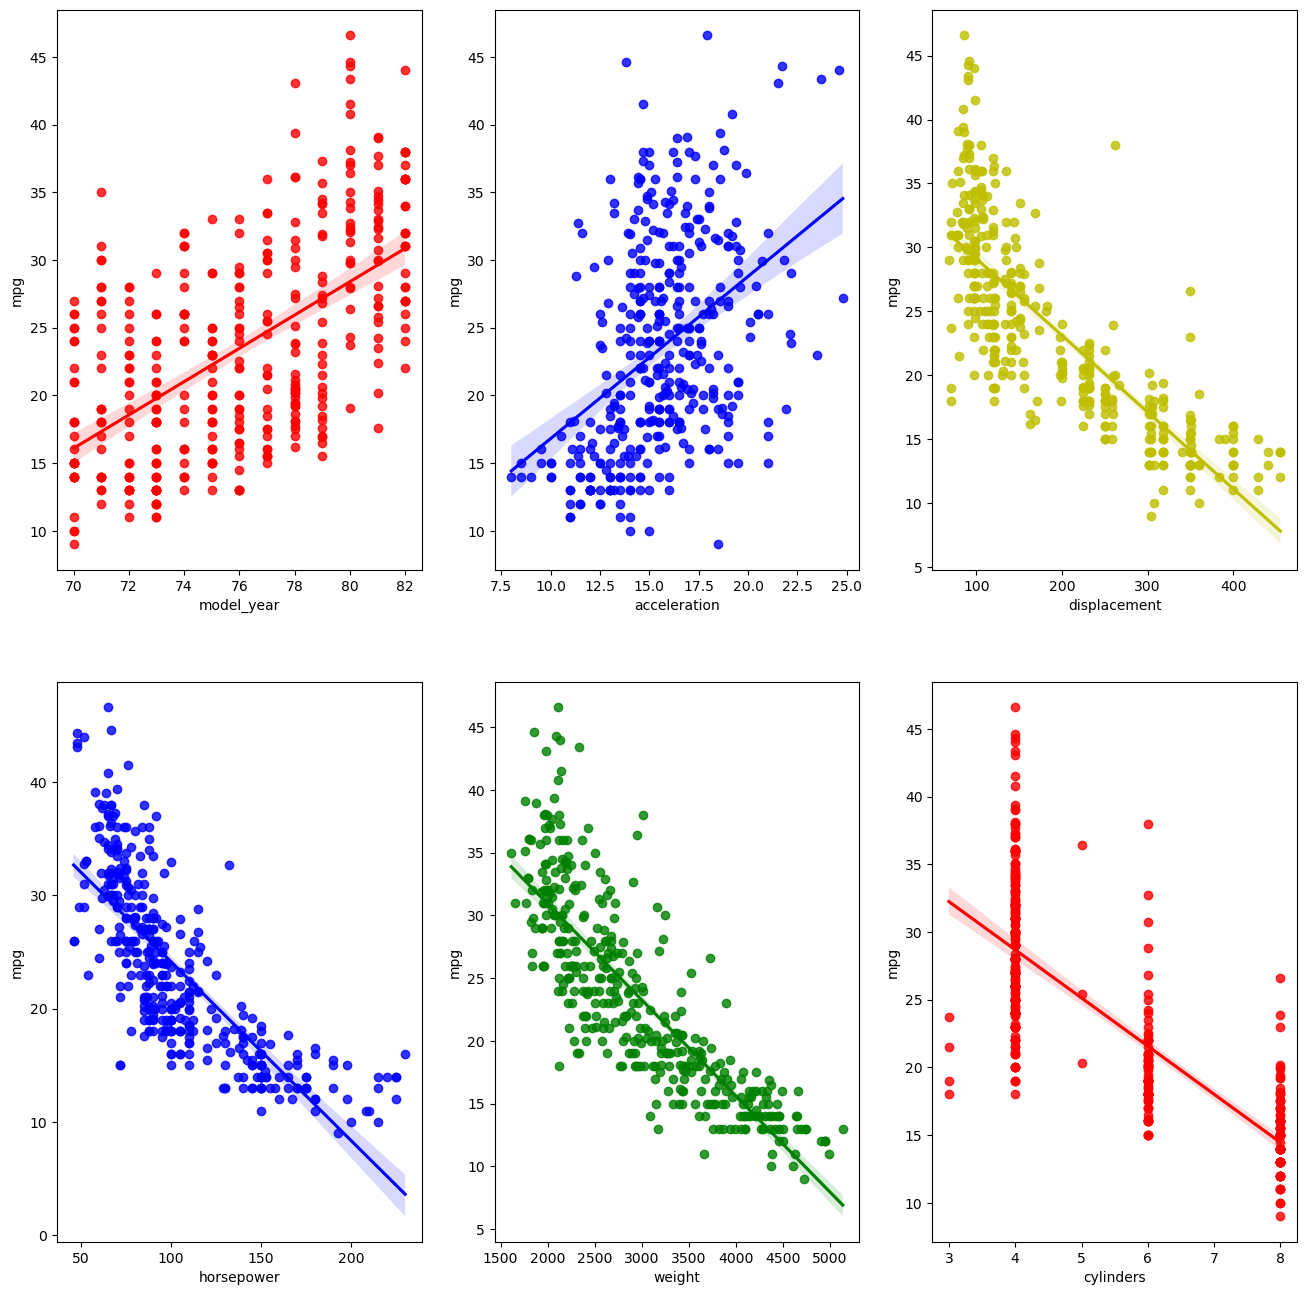

In [133]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'horsepower','weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'b','g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

## 과제2 : horsepower를 1/10 로 줄이고, 회귀계수가 어떻게 변하는지 본다. 

In [134]:
data_df["h10"]= data_df["horsepower"]
X = data_df.drop(['horsepower'], axis=1, inplace=False)

(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null 

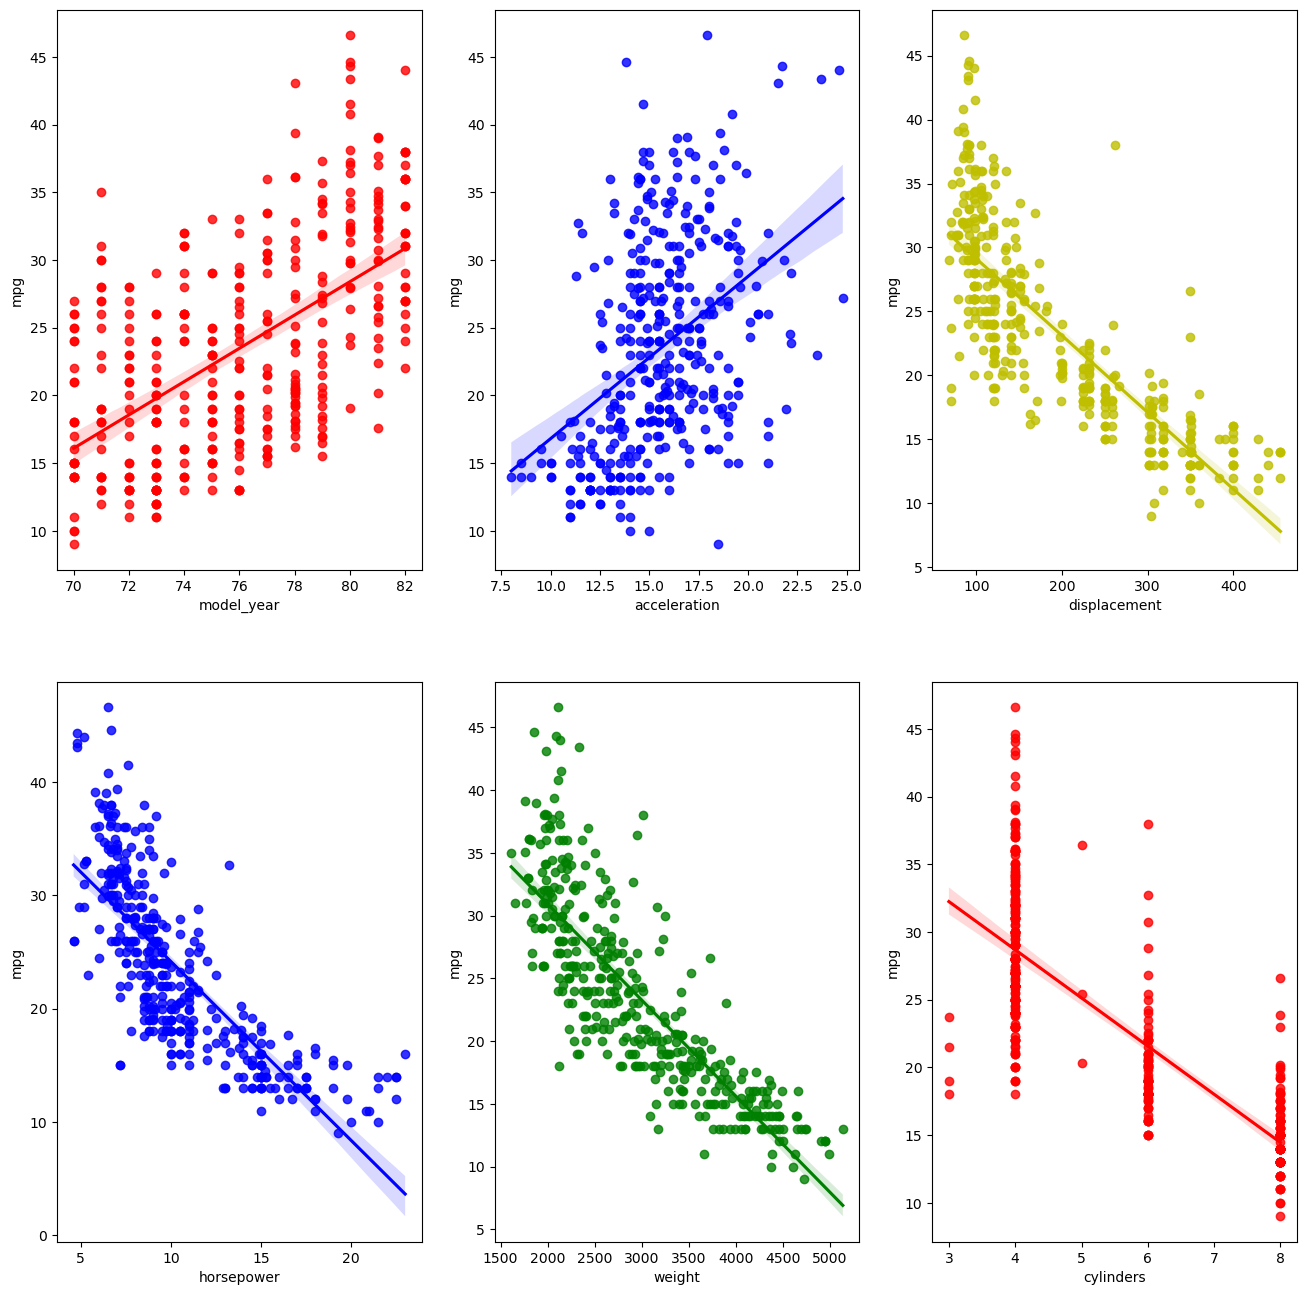

In [137]:
data_df = pd.read_csv("./files/auto-mpg.csv",header=0,engine='python')
print(data_df.shape)

data_df.info()

data_df = data_df.drop(['car_name','origin'],axis = 1,inplace = False)
data_df.info()
# horsepower 1/10 으로 줄인다.
#data_df.horsepower = data_df.horsepower.astype('int')
data_df[data_df.horsepower == '?'] # horse ? 값찾기
data_df.horsepower = data_df.horsepower.replace('?',np.NAN)
data_df = data_df.dropna()
data_df.horsepower = data_df.horsepower.astype('int')
data_df.horsepower = data_df.horsepower * 0.1
data_df.head()
y = data_df['mpg']
x = data_df.drop(['mpg'],axis=1,inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print(np.round(lr.intercept_,2))
print(lr.coef_)
mse = mean_squared_error(y_test,y_predict)
print(mse)
rsme = np.sqrt(mse)
print(rsme)
coef = pd.Series(data=lr.coef_,index = x.columns)
coef
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'horsepower','weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'b','g', 'r']
print(data_df.head())
for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

###   <<<< 연비 예측하기  >>>>

In [138]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders (%d ~ %d): "%(data_df['cylinders'].min(), data_df['cylinders'].max())))
displacement_1 = int(input("displacement (%d ~ %d): "%(data_df['displacement'].min(), data_df['displacement'].max())))
horsepower_1=int(input("horsepower (%d ~ %d): "%(data_df['horsepower'].min(), data_df['horsepower'].max())))
weight_1 = int(input("weight (%f ~ %f): "%(data_df['weight'].min(), data_df['weight'].max())))
acceleration_1 = int(input("acceleration (%f ~ %f): "%(data_df['acceleration'].min(), data_df['acceleration'].max())))
model_year_1 = int(input("model_year (%f ~ %f): "%(data_df['model_year'].min(), data_df['model_year'].max())))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders (3 ~ 8): 8
displacement (68 ~ 455): 80
horsepower (4 ~ 23): 20
weight (1613.000000 ~ 5140.000000): 1615
acceleration (8.000000 ~ 24.800000): 10
model_year (70.000000 ~ 82.000000): 71


In [139]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, horsepower_1, weight_1, acceleration_1 , model_year_1]])

In [140]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 27.04 입니다.


## 5) 결과 개선 

- 다른 regression model
- parameter tuning 
- feature selection

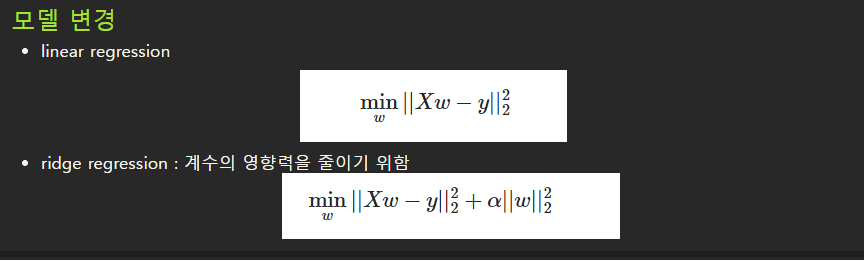

In [141]:
from sklearn import linear_model

models= [ LinearRegression(), linear_model.Ridge(alpha=.5) ]

for m in models:
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (mse)

12.85995766083283
12.85945884383705


### parameter tuning

In [142]:

for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/float(10)) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (al/10, mse)

0.0 12.859957660832837
0.1 12.859857528862523
0.2 12.859757581767647
0.3 12.85965781895694
0.4 12.859558239841943
0.5 12.85945884383705
0.6 12.859359630359522
0.7 12.859260598829417
0.8 12.859161748669624
0.9 12.859063079305797


### feature selection

- 사용할 feature 선택
- K-best : feature 중 score가 높은 것 k 개 선택
- transform : k개 만 남기는 걸로 변환

cylinders: 451.044953
displacement: 576.367358
horsepower: 486.318544
weight: 682.203713
acceleration: 72.450006
model_year: 138.450494


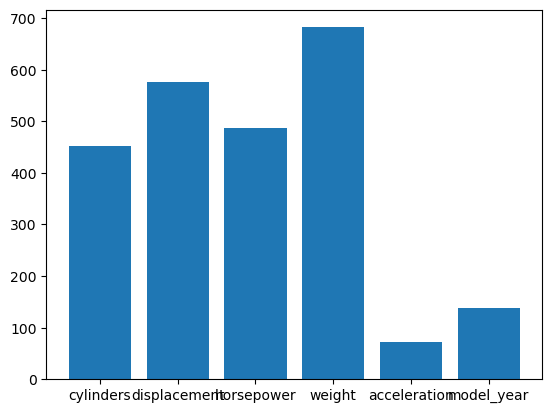

In [143]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test, k):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test,6)

for i in range(len(fs.scores_)):
	print('%s: %f' % (X_test.columns[i], fs.scores_[i]))
# plot the scores
pyplot.bar(X_test.columns, fs.scores_)
pyplot.show()

In [144]:
# 하나 씩 늘려가면서 score 보기

for k in range(1,7) :
    X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, k)

    m= LinearRegression()
    m.fit(X_train_fs, Y_train)
    Y_predict= m.predict(X_test_fs)
    mse = mean_squared_error(Y_test, Y_predict)
    print (k,  mse)

1 20.20636106811814
2 19.868066056301114
3 19.53509071076374
4 19.55818867634523
5 12.523159935714538
6 12.85995766083283


## 6) validation, test 

- 파라메터 선택 => 결과에 많은 영향을 줌
- test set을 이용한 파라메터 선택은 test set 에 fit 되었다고 볼 수도 있음
- 해결 방향 : 파라메터 선택을 위한 validation set과, 성능 평가를 위한 test set을 분리



In [145]:
# 6:2:2  split
X_train, X_tv, Y_train, Y_tv = train_test_split(X, Y, test_size=0.4, random_state=1)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_tv, Y_tv, test_size=0.5, random_state=1)
print (X_train.shape, X_validation.shape, X_test.shape)


(235, 7) (79, 7) (78, 7)


In [146]:
# 파라메터 선택  : alpha =0 
for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/10) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_validation)
    #print (Y_validation, Y_predict)
    mse = mean_squared_error(Y_validation, Y_predict)
    print (al/10, mse)

0.0 4.594166142709913e-28
0.1 1.879398857159803e-08
0.2 7.516663186172846e-08
0.3 1.6910395925835904e-07
0.4 3.0059201741836035e-07
0.5 4.696168701698413e-07
0.6 6.761645984214208e-07
0.7 9.202213000306895e-07
0.8 1.2017730897341008e-06
0.9 1.5208060989996257e-06


In [147]:
# test 
m= linear_model.Ridge(alpha=9/float(10)) 
m.fit(X_train, Y_train)
Y_predict= m.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
print (mse)


1.425866390176302e-06


## 7) train, test data 에 따라 달라지는 결과 

In [148]:
for i in range(11, 20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    m= linear_model.Ridge(alpha=9/float(10)) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (mse)

1.2342879053543832e-06
1.9181508093824823e-06
1.0720050188745756e-06
9.506549780551265e-07
1.5218974086313357e-06
1.2635692239543257e-06
1.0113773946360505e-06
9.357753782097034e-07
8.284588421018835e-07


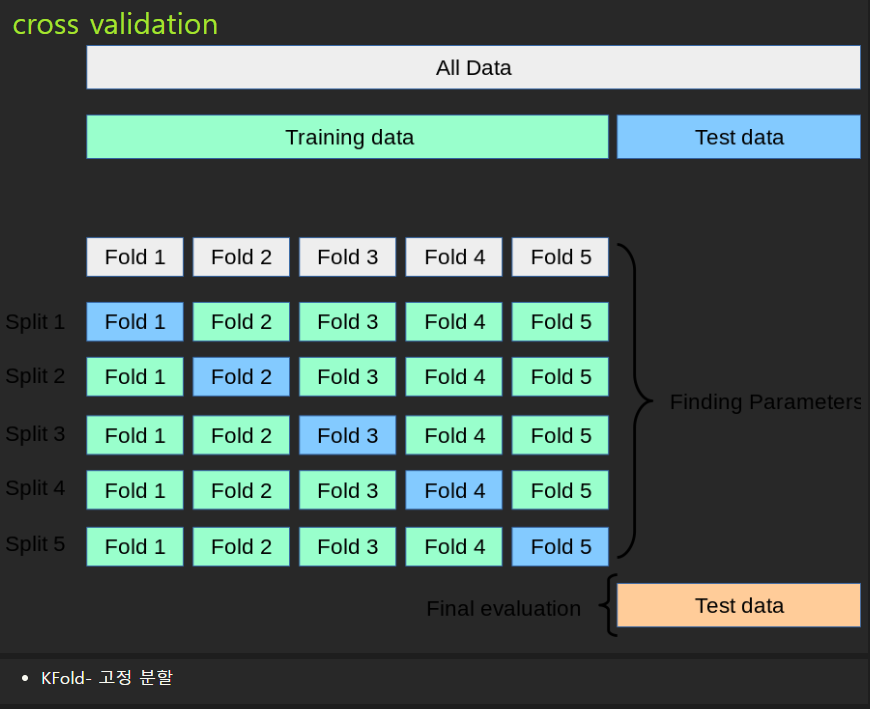

In [149]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

m= linear_model.Ridge(alpha=float(9)/10) 
scores= cross_validate(m, X, Y, cv=5 , scoring=make_scorer(mean_squared_error))

print ( scores['test_score'])


[8.89207134e-07 6.56074587e-07 3.05429766e-07 1.04950618e-06
 3.76890481e-06]


- KFold - random 추출

In [150]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
kfold=KFold(n_splits=5, shuffle=True, random_state=1) # shuffle = False 면 고정 추출
scores= cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))
print (scores)

[8.21259331e-07 7.33721165e-07 1.12320846e-06 6.72275913e-07
 5.20132536e-07]


# 머신러닝 - 분류

- 로지스틱회귀
- 전처리 : Scaling, PCA
- 결정트리
- 분류 성능지표
- encoding

## classification

- X: 특징 벡터
- y: class (nominal)
    - regression에서는 y가 numeric value
   
### 가장 단순한 분류

- ZeroR : 다수인 클래스로 판단 

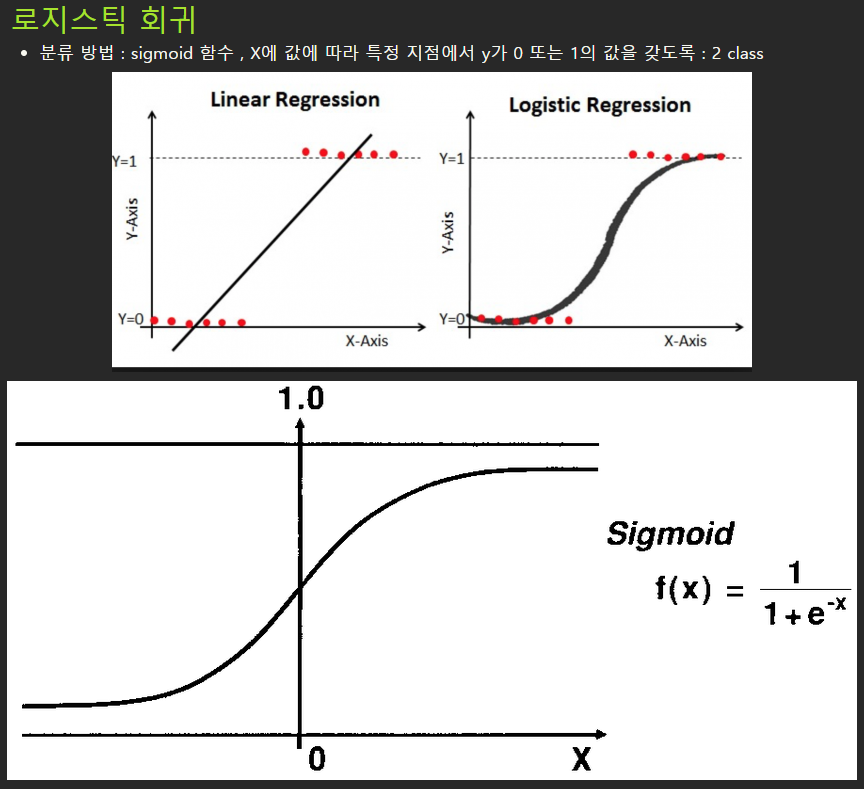
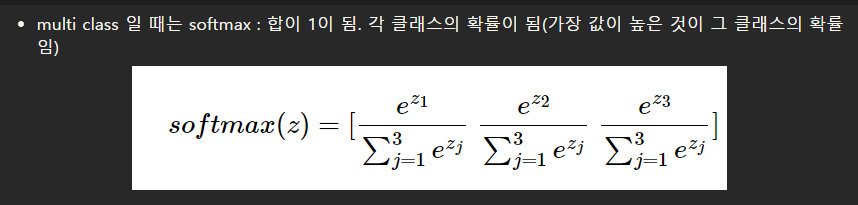

## 로지스틱 회귀 실습


### 1) 데이터 획득

In [151]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [152]:
b_cancer = load_breast_cancer()

### 2) 데이터 탐색

In [153]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [154]:
b_cancer_df= pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

- 도수 세기

In [155]:
b_cancer_df['diagnosis']= b_cancer.target
b_cancer_df['diagnosis' ].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [156]:
b_cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890          0  
1          0.2750                  0.08902          0  
2          0.3613                  0.08758          0  
3          0.6638                  0.17300          0  
4          0.2364                  0.07678          0  

[5 rows x 31 columns]

In [157]:
b_cancer_df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension   diagnosis  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [158]:
print('유방암 진단 데이터셋 모양 : ', b_cancer_df.shape)

유방암 진단 데이터셋 모양 :  (569, 31)


- 시각화

<AxesSubplot:xlabel='mean radius', ylabel='Density'>

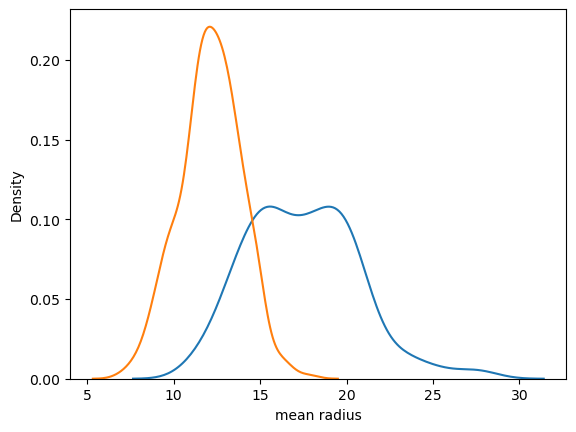

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.kdeplot(b_cancer_df[ b_cancer_df ['diagnosis' ]==0]['mean radius'])
sns.kdeplot(b_cancer_df[ b_cancer_df ['diagnosis' ]==1]['mean radius'])


### 3) 전처리

- scaling : 각 특징 별 값의 범위를 맞춰줌 
- standard scaler : z = (x - u) / s ,  -a ~ +a
- min-max scaler :  z= (x - min) / (max-min) , 0~1

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [161]:
b_cancer_scaled = scaler.fit_transform(b_cancer.data) #차원 조절, data에 맞춰서
print (b_cancer_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


- scale 결과 확인

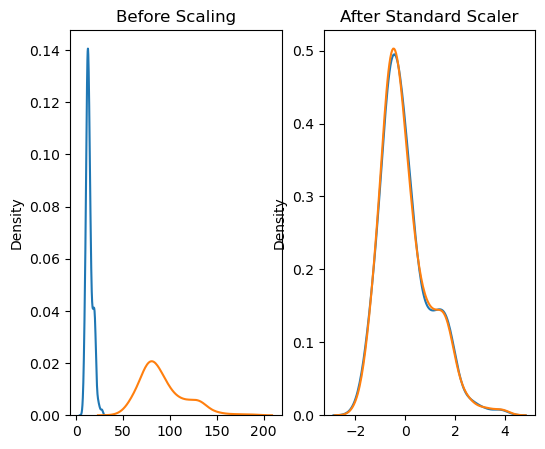

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(b_cancer.data[:,0], ax=ax1) # mean r
sns.kdeplot(b_cancer.data[:,2], ax=ax1) # mean perimadiuseter
ax2.set_title('After Standard Scaler')
sns.kdeplot(b_cancer_scaled[:,0], ax=ax2)
sns.kdeplot(b_cancer_scaled[:,2], ax=ax2)
plt.show()

### 4) 모델 학습

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [164]:
# X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled 

#X=b_cancer.data

In [165]:
Y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [166]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [167]:
# 로지스틱 회귀 분석 : (1)모델 생성
lr_b_cancer = LogisticRegression()

In [168]:
# 로지스틱 회귀 분석 : (2)모델 훈련
lr_b_cancer.fit(X_train, Y_train)

LogisticRegression()

### 5) 성능평가

In [169]:
# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

In [170]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [171]:
# 혼돈행렬 : \ 직선은 정답(60, 107), / 직선이 오답(3,1)
print (confusion_matrix(Y_test, Y_predict)) #현재 결과는 정확도가 굉장히 높은 편

[[ 60   3]
 [  1 107]]


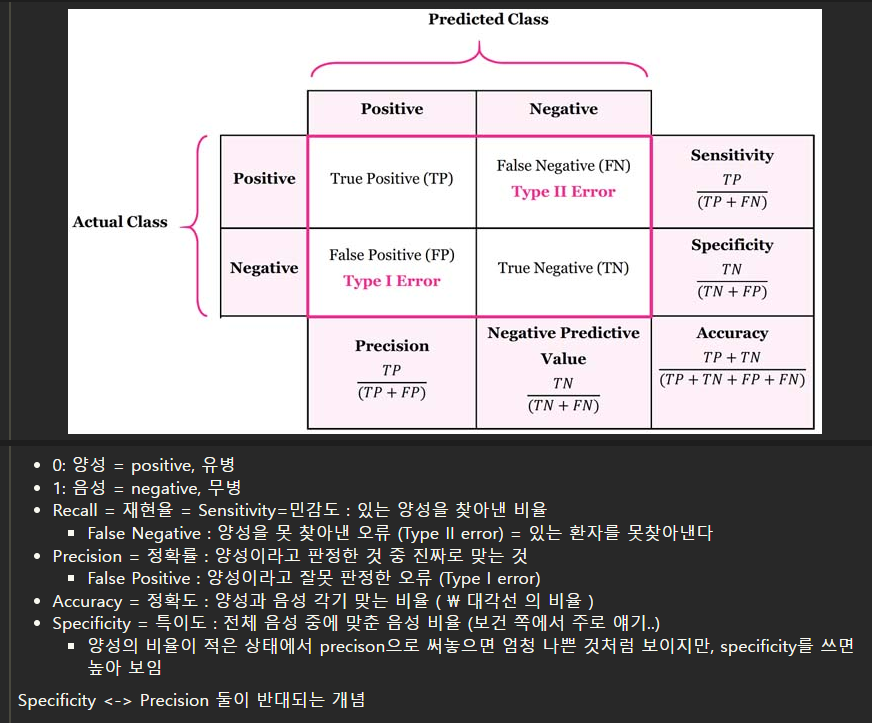
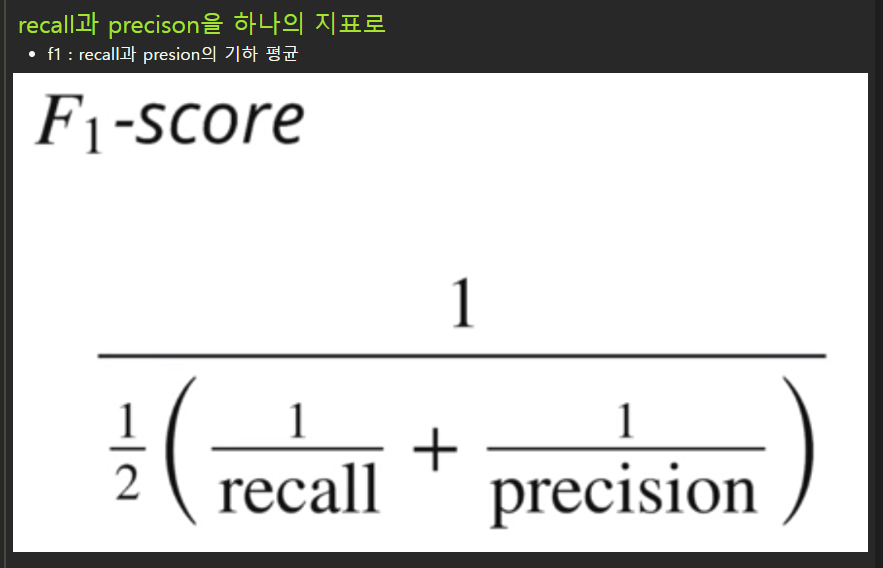

In [172]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)


In [174]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991,  F1: 0.982


### 6) PCA



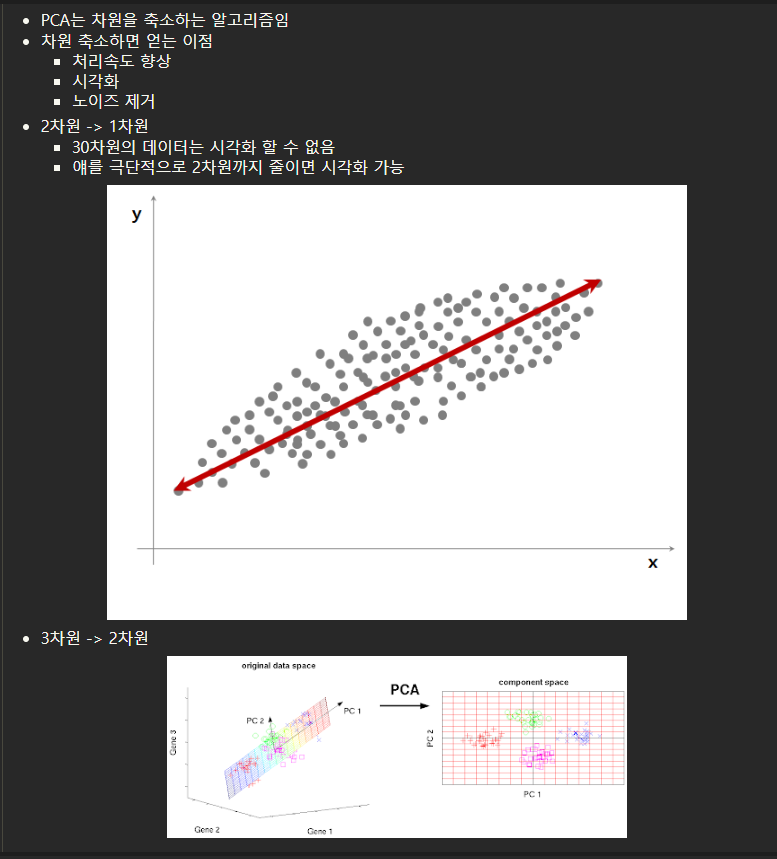

In [175]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=8)
pca.fit(b_cancer_scaled)
b_cancer_pca = pca.transform(b_cancer_scaled)


In [176]:
b_cancer_pca

array([[ 9.19283683,  1.94858307, -1.12316616, ...,  1.41142439,
         2.15937044, -0.39840657],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.02865638,
         0.01335785,  0.24098836],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.54145218,
        -0.66816686,  0.0973737 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ..., -0.53444719,
        -0.19275823,  0.34188682],
       [10.37479406,  1.67201011, -1.87702933, ...,  0.56793643,
         0.22308209, -0.28023843],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.6178373 ,
         1.69895206,  1.04635385]])

In [177]:
# X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_pca

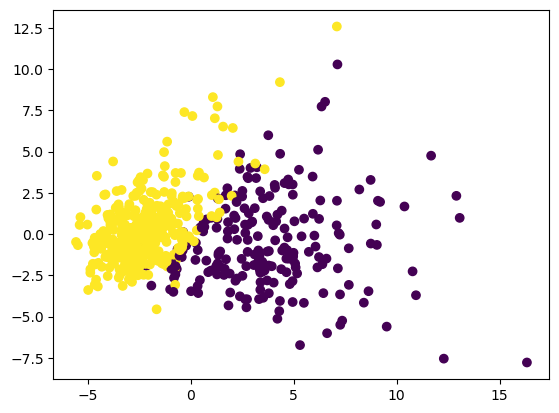

In [178]:
plt.scatter( X[:, 0], X[:,1], c=Y)

In [179]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [180]:
# 로지스틱 회귀 분석 : (1)모델 생성
lr_b_cancer = LogisticRegression()

In [181]:
# 로지스틱 회귀 분석 : (2)모델 훈련
lr_b_cancer.fit(X_train, Y_train)

LogisticRegression()

In [182]:
# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [184]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

In [185]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.959, 정밀도: 0.972, 재현율: 0.963,  F1: 0.967


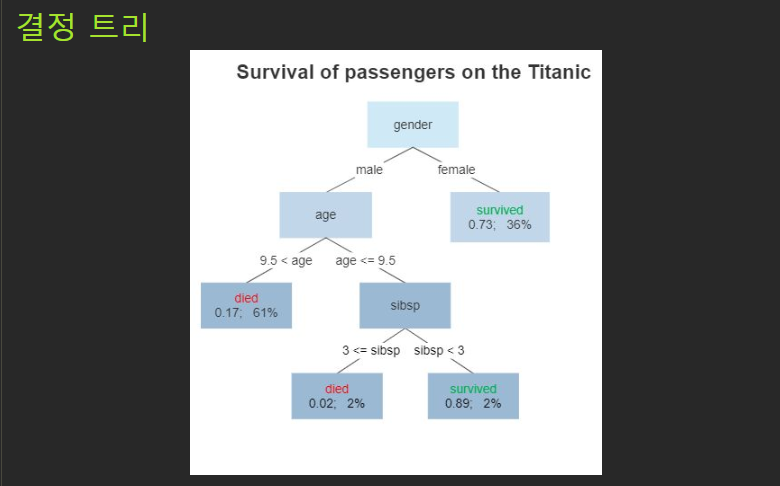

### 1) 데이터 수집
https://archive.ics.uci.edu/ml/machine-learning-databases/00240/
### 2) 데이터 탐색

In [186]:
import numpy as np
import pandas as pd


In [188]:

# 피처 이름 파일 읽어오기 

feature_name_df = pd.read_csv('./files/datas/features.txt', sep='\s+',  header=None, names=['index', 'feature_name'], engine='python')

In [189]:
feature_name_df.head()
feature_name_df.shape

(561, 2)

In [190]:
#index 제거하고, feature_name만 리스트로 저장
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print (feature_name)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [191]:
X_train = pd.read_csv('./files/datas/train/X_train.txt', sep='\s+',header=None,  engine='python')
X_test = pd.read_csv('./files/datas/test/X_test.txt', sep='\s+', header=None, engine='python')

Y_train = pd.read_csv('./files/datas/train/y_train.txt', sep='\s+', header=None,  engine='python')
Y_test = pd.read_csv('./files/datas/test/y_test.txt', sep='\s+', header=None,  engine='python')

In [192]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [193]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [195]:
X_train.head()

0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559       560  
0  0.030400 -0.464761 -0.018446 -0.841247  0.179941 -0.058627  
1 -0.007435 -0.732626  0.703511 -0.844788  0.180289 -0.054317  
2  0.177899  0.100699  0.808529 -0.848933  0.180637 -0.049118  
3 -0.012892  0.640011 -0.485366 -0.848649  0.181935 -0.047663  
4  0.122542  0.693578 -0.615971 -0.847865  0.185151 -0.043892  

[5 rows x 561 columns]

In [196]:
print(Y_train.value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64


In [198]:
label_name_df = pd.read_csv('./files/datas/activity_labels.txt', sep='\s+',  header=None, names=['index', 'label'], engine='python')

### 3) 모델 구축 : 결정트리모델

In [199]:
from sklearn.tree import DecisionTreeClassifier
# 결정 트리 분류 분석 : 1) 모델 생성
dt_HAR = DecisionTreeClassifier(random_state=156)

# 결정 트리 분류 분석 : 2) 모델 훈련
dt_HAR.fit(X_train, Y_train)

# 결정 트리 분류 분석 : 3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = dt_HAR.predict(X_test)


In [200]:

from sklearn.metrics import confusion_matrix
print (confusion_matrix(Y_test, Y_predict))

[[440  34  22   0   0   0]
 [ 83 363  25   0   0   0]
 [ 23  52 345   0   0   0]
 [  0   0   0 375 116   0]
 [  0   0   0  73 459   0]
 [  0   0   0   0   0 537]]


### 4) 결과 분석

In [201]:
from sklearn.metrics import accuracy_score

In [202]:
accuracy = accuracy_score(Y_test, Y_predict)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8548


#### 최적 파라미터 값 찾기

In [203]:
print('결정 트리의 현재 하이퍼 파라미터 : \n', dt_HAR.get_params())

결정 트리의 현재 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [204]:
from sklearn.model_selection import GridSearchCV

#### 최적 파라미터 찾기

In [205]:
params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [206]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','param_min_samples_split', 'mean_test_score', 'mean_train_score']]

param_max_depth param_min_samples_split  mean_test_score  mean_train_score
0               8                       8         0.852023          0.981468
1               8                      16         0.854879          0.979836
2               8                      24         0.851342          0.978237
3              16                       8         0.844136          0.994457
4              16                      16         0.847127          0.990479
5              16                      24         0.849439          0.986772
6              20                       8         0.846040          0.994491
7              20                      16         0.848624          0.990479
8              20                      24         0.849167          0.986772

In [207]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8549, 최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_split': 16}


In [208]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도 : {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도 : 0.8717


#### 중요 피처 확인하기

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
X_train = pd.read_csv('./files/datas/train/X_train.txt', sep='\s+',header=None,  engine='python')
feature_importance_values = dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X_train.columns)

In [211]:
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]
print (feature_top10.index )

Int64Index([52, 389, 559, 508, 74, 448, 159, 57, 209, 129], dtype='int64')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'tGravityAcc-min()-X'),
  Text(1, 0, 'fBodyAccJerk-bandsEnergy()-1,16'),
  Text(2, 0, 'angle(Y,gravityMean)'),
  Text(3, 0, 'fBodyAccMag-energy()'),
  Text(4, 0, 'tGravityAcc-arCoeff()-Z,2'),
  Text(5, 0, 'fBodyGyro-maxInds-X'),
  Text(6, 0, 'tBodyGyro-correlation()-Y,Z'),
  Text(7, 0, 'tGravityAcc-energy()-Y'),
  Text(8, 0, 'tBodyAccMag-arCoeff()1'),
  Text(9, 0, 'tBodyGyro-max()-X')])

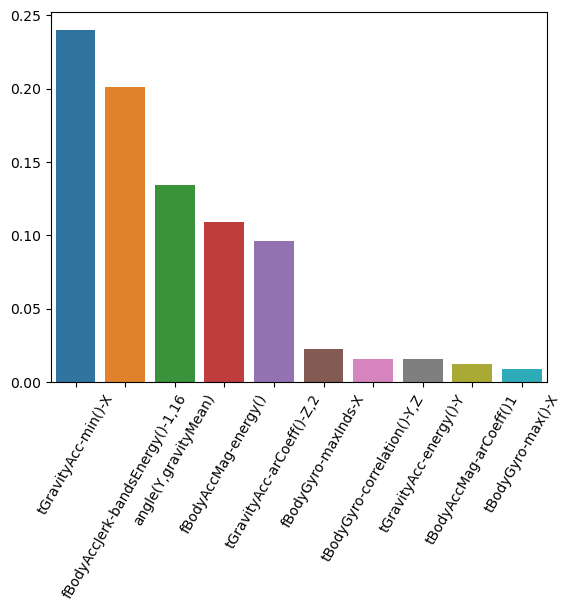

In [212]:
sns.barplot(y=feature_top10, x= [feature_name[i] for i in feature_top10.index])
plt.xticks(rotation=60)

In [213]:
feature_importance_values = dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X_train.columns)
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]
 
    
dt_HAR2 = DecisionTreeClassifier(random_state=156)    
dt_HAR2.fit(X_train.iloc[:,feature_top10.index],Y_train)

y_predict2 = dt_HAR2.predict(X_test.iloc[:,feature_top10.index])
accuracy = accuracy_score(Y_test, y_predict2)
print('중요 피처 결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

중요 피처 결정 트리 예측 정확도 : 0.8293


### 5) 결정트리 시각화
- core 설치 :  https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/graphviz-install-2.44.1-win64.exe 를 다운로드 받아서 설치

In [214]:
!pip install graphviz

In [215]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성. 
export_graphviz(best_dt_HAR, out_file="tree.dot", class_names=label_name , feature_names = feature_name, impurity=True, filled=True)

NameError: name 'label_name' is not defined

In [216]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

FileNotFoundError: [Errno 2] No such file or directory: 'tree.dot'

## nominal feature coding (quantify)

In [217]:
import seaborn as sns
import pandas as pd


titanic= sns.load_dataset("titanic")
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [218]:
#안쓸 컬럼 날리기 : 구제 불능 NA,  동일한 의미의 column
titanic = titanic.drop(['pclass', 'deck', 'embark_town', 'alive', 'alone'], axis=1, inplace=False)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   sex         891 non-null    object  
 2   age         714 non-null    float64 
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   embarked    889 non-null    object  
 7   class       891 non-null    category
 8   who         891 non-null    object  
 9   adult_male  891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(3)
memory usage: 57.7+ KB


In [219]:
#남은 결측치 처리
titanic.age= titanic.age.fillna( titanic.age.median())
titanic= titanic.dropna()  # 모든 필드에 대해 na가 있으면 record drop
titanic.info()
#titanic = titanic.reset_index() #안하면 밑밑 블럭에서 오류 발생

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    889 non-null    int64   
 1   sex         889 non-null    object  
 2   age         889 non-null    float64 
 3   sibsp       889 non-null    int64   
 4   parch       889 non-null    int64   
 5   fare        889 non-null    float64 
 6   embarked    889 non-null    object  
 7   class       889 non-null    category
 8   who         889 non-null    object  
 9   adult_male  889 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(3)
memory usage: 64.4+ KB


In [220]:
#- nominal 을 그대로 넣을 경우 : nominal data 때문에 에러 발생
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Y= titanic['survived']
X= titanic.drop(['survived', 'sex', 'embarked', 'who', 'adult_male'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


In [221]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() #limit 정해주기, 1번 문제처럼
model.fit (X_train, Y_train)
Y_predict= model.predict ( X_test)
print (confusion_matrix(Y_test, Y_predict))
f1 = f1_score(Y_test, Y_predict)
print ("f1 score:",  f1)

ValueError: could not convert string to float: 'Second'

### nominal data의 encoding (quantify)
- label encoding : ordered nominal은 1,2,3 같은 숫자를 붙여준다.
- one-hot encoding : pure nominal 은  1000, 0100, 0010, 0001  같이 1개만 값을 가지는 n차원 feature가 된다 (값의 종류 갯수 에 따라)


### label encoding
- from sklearn.preprocessing import LabelEncoder
- le = LabelEncoder()
- result = le.fit_transform(df['컬럼'])
- column 대체

In [222]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #label 순서 지정해주는 법 찾아보기
result = le.fit_transform(titanic['class'])
print (result)
print (le.classes_)

[2 0 2 0 2 2 0 2 2 1 2 0 2 2 2 1 2 1 2 2 1 1 2 0 2 2 2 0 2 2 0 0 2 1 0 0 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 0 1 0 0 1 2 1 2 2 0 2 0 2 1 2 2 2 1 2 1 2 2
 2 2 2 1 2 2 2 2 0 1 2 2 2 0 2 2 2 0 2 2 2 0 0 1 1 2 2 0 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 1 0 2 1 2 1 1 0 2 2 2 2 2 2 2 2 1 1 1 0 0 2 0 2 2 2 2 1 1 2 2 1
 1 1 0 2 2 2 0 2 2 2 2 2 1 2 2 2 2 0 2 0 2 0 2 2 2 0 2 2 0 1 2 2 1 2 1 2 0
 2 0 2 2 1 1 2 1 0 0 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 1 2 1 2 0 2 1 0 1 2 1 2
 2 0 2 1 2 1 2 0 2 1 2 1 2 1 1 1 1 2 2 1 2 2 0 2 1 0 1 2 2 0 2 2 2 0 0 0 1
 2 2 0 0 2 1 2 2 0 0 0 2 1 0 2 0 2 1 2 2 2 2 2 2 0 2 2 2 1 2 0 0 1 2 2 0 2
 0 0 0 2 2 2 1 2 0 0 0 1 0 0 0 1 2 1 2 1 1 0 0 2 2 1 1 2 0 2 1 2 0 2 0 0 2
 0 2 0 0 2 0 1 0 1 1 1 1 1 2 2 2 2 0 2 2 2 2 0 1 2 2 2 1 2 2 2 2 0 2 2 0 0
 2 2 0 2 0 2 0 2 2 0 2 2 0 2 1 2 1 2 1 0 2 2 0 2 2 2 1 1 1 2 2 2 2 2 1 2 1
 2 2 2 2 0 1 2 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 0 2 1 2 0 0 2 1 0 1 1 2 2 1 2
 0 1 0 2 0 1 2 0 0 2 2 0 0 1 2 0 2 0 1 2 2 1 0 2 2 2 2 1 1 2 0 1 2 2 2 2 1
 2 2 0 2 0 0 2 2 2 2 0 0 

In [223]:
titanic['class'] = result
titanic

survived     sex   age  sibsp  parch     fare embarked  class    who  \
0           0    male  22.0      1      0   7.2500        S      2    man   
1           1  female  38.0      1      0  71.2833        C      0  woman   
2           1  female  26.0      0      0   7.9250        S      2  woman   
3           1  female  35.0      1      0  53.1000        S      0  woman   
4           0    male  35.0      0      0   8.0500        S      2    man   
..        ...     ...   ...    ...    ...      ...      ...    ...    ...   
886         0    male  27.0      0      0  13.0000        S      1    man   
887         1  female  19.0      0      0  30.0000        S      0  woman   
888         0  female  28.0      1      2  23.4500        S      2  woman   
889         1    male  26.0      0      0  30.0000        C      0    man   
890         0    male  32.0      0      0   7.7500        Q      2    man   

     adult_male  
0          True  
1         False  
2         False  
3         False  
4          True  
..          ...  
886        True  
887       False  
888       False  
889        True  
890        True  

[889 rows x 10 columns]

### onehot encoding
- from sklearn.preprocessing import OneHotEncoder
- ohe = OneHotEncoder(sparse_output=False)
- fit_transform(df[['컬럼']])
- 데이터 프레임화 하여 컬럼 추가 & 기존 컬럼 삭제

In [224]:
# onehot vector로 변경
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
sex_ohe = ohe.fit_transform(titanic[['sex']])
print (sex_ohe)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [225]:
# data frame column으로 변경
sex_df = pd.DataFrame ( sex_ohe, columns=['sex_m', 'sex_f'])
sex_df

sex_m  sex_f
0      0.0    1.0
1      1.0    0.0
2      1.0    0.0
3      1.0    0.0
4      0.0    1.0
..     ...    ...
884    0.0    1.0
885    1.0    0.0
886    1.0    0.0
887    0.0    1.0
888    0.0    1.0

[889 rows x 2 columns]

In [226]:
# 바꿔주기
print (titanic.shape, sex_df.shape)
titanic_ec=pd.concat([titanic.drop(columns=['sex']),  sex_df], axis=1) 
titanic_ec

(889, 10) (889, 2)


survived   age  sibsp  parch     fare embarked  class    who adult_male  \
0         0.0  22.0    1.0    0.0   7.2500        S    2.0    man       True   
1         1.0  38.0    1.0    0.0  71.2833        C    0.0  woman      False   
2         1.0  26.0    0.0    0.0   7.9250        S    2.0  woman      False   
3         1.0  35.0    1.0    0.0  53.1000        S    0.0  woman      False   
4         0.0  35.0    0.0    0.0   8.0500        S    2.0    man       True   
..        ...   ...    ...    ...      ...      ...    ...    ...        ...   
888       0.0  28.0    1.0    2.0  23.4500        S    2.0  woman      False   
889       1.0  26.0    0.0    0.0  30.0000        C    0.0    man       True   
890       0.0  32.0    0.0    0.0   7.7500        Q    2.0    man       True   
61        NaN   NaN    NaN    NaN      NaN      NaN    NaN    NaN        NaN   
829       NaN   NaN    NaN    NaN      NaN      NaN    NaN    NaN        NaN   

     sex_m  sex_f  
0      0.0    1.0  
1      1.0    0.0  
2      1.0    0.0  
3      1.0    0.0  
4      0.0    1.0  
..     ...    ...  
888    0.0    1.0  
889    NaN    NaN  
890    NaN    NaN  
61     0.0    1.0  
829    0.0    1.0  

[891 rows x 11 columns]

In [227]:
titanic.reset_index( )

index  survived     sex   age  sibsp  parch     fare embarked  class  \
0        0         0    male  22.0      1      0   7.2500        S      2   
1        1         1  female  38.0      1      0  71.2833        C      0   
2        2         1  female  26.0      0      0   7.9250        S      2   
3        3         1  female  35.0      1      0  53.1000        S      0   
4        4         0    male  35.0      0      0   8.0500        S      2   
..     ...       ...     ...   ...    ...    ...      ...      ...    ...   
884    886         0    male  27.0      0      0  13.0000        S      1   
885    887         1  female  19.0      0      0  30.0000        S      0   
886    888         0  female  28.0      1      2  23.4500        S      2   
887    889         1    male  26.0      0      0  30.0000        C      0   
888    890         0    male  32.0      0      0   7.7500        Q      2   

       who  adult_male  
0      man        True  
1    woman       False  
2    woman       False  
3    woman       False  
4      man        True  
..     ...         ...  
884    man        True  
885  woman       False  
886  woman       False  
887    man        True  
888    man        True  

[889 rows x 11 columns]

In [228]:
print (titanic.shape, sex_df.shape)
titanic_ec=pd.concat([titanic.reset_index().drop(columns=['index', 'sex']),  sex_df], axis=1)
titanic_ec

(889, 10) (889, 2)


survived   age  sibsp  parch     fare embarked  class    who  adult_male  \
0           0  22.0      1      0   7.2500        S      2    man        True   
1           1  38.0      1      0  71.2833        C      0  woman       False   
2           1  26.0      0      0   7.9250        S      2  woman       False   
3           1  35.0      1      0  53.1000        S      0  woman       False   
4           0  35.0      0      0   8.0500        S      2    man        True   
..        ...   ...    ...    ...      ...      ...    ...    ...         ...   
884         0  27.0      0      0  13.0000        S      1    man        True   
885         1  19.0      0      0  30.0000        S      0  woman       False   
886         0  28.0      1      2  23.4500        S      2  woman       False   
887         1  26.0      0      0  30.0000        C      0    man        True   
888         0  32.0      0      0   7.7500        Q      2    man        True   

     sex_m  sex_f  
0      0.0    1.0  
1      1.0    0.0  
2      1.0    0.0  
3      1.0    0.0  
4      0.0    1.0  
..     ...    ...  
884    0.0    1.0  
885    1.0    0.0  
886    1.0    0.0  
887    0.0    1.0  
888    0.0    1.0  

[889 rows x 11 columns]

- 한꺼번에 여러 컬럼 처리 

In [230]:
ohe = OneHotEncoder(sparse_output=False)
ec = ohe.fit_transform(titanic_ec[['embarked', 'who', 'adult_male']])
ec_df = pd.DataFrame ( ec, columns=['e1','e2', 'e3', 'w1','w2','w3', 'a1', 'a2'])
ec_df

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

In [232]:
ohe = OneHotEncoder(sparse_output=False)
ec = ohe.fit_transform(titanic_ec[['embarked', 'who', 'adult_male']])
ec_df = pd.DataFrame ( ec, columns=['e1','e2', 'e3', 'w1','w2','w3', 'a1', 'a2'])
ec_df

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

In [233]:
titanic_ec=titanic_ec.drop(columns=['level_0'])

KeyError: "['level_0'] not found in axis"

In [234]:
from sklearn.model_selection import train_test_split
Y= titanic_ec['survived']
X= titanic_ec.drop(['survived' ], axis=1, inplace=False)
print (X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

      age  sibsp  parch     fare embarked  class    who  adult_male  sex_m  \
0    22.0      1      0   7.2500        S      2    man        True    0.0   
1    38.0      1      0  71.2833        C      0  woman       False    1.0   
2    26.0      0      0   7.9250        S      2  woman       False    1.0   
3    35.0      1      0  53.1000        S      0  woman       False    1.0   
4    35.0      0      0   8.0500        S      2    man        True    0.0   
..    ...    ...    ...      ...      ...    ...    ...         ...    ...   
884  27.0      0      0  13.0000        S      1    man        True    0.0   
885  19.0      0      0  30.0000        S      0  woman       False    1.0   
886  28.0      1      2  23.4500        S      2  woman       False    1.0   
887  26.0      0      0  30.0000        C      0    man        True    0.0   
888  32.0      0      0   7.7500        Q      2    man        True    0.0   

     sex_f  
0      1.0  
1      0.0  
2      0.0  
3      0.0 

In [235]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [236]:
from sklearn import svm
model=svm.SVC(C=100)


In [237]:
model.fit (X_train, Y_train)
Y_predict=model.predict ( X_test)
print (confusion_matrix(Y_test, Y_predict))
f1 = f1_score(Y_test, Y_predict)
print ("f1 score:",  f1)

ValueError: could not convert string to float: 'S'